In [1]:
import glob, json, argparse, os, sys
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio.PDB import *

sys.path.insert(0,'/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction')
from src.colabfold_process_output_utils import *
from src.colabfold_process_output import *
from src.analyze_predictions import *

In [2]:
# set path
structure_dir_path = '/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction/data/protein_structures/'

# Import data

In [3]:
df = pd.read_csv('/data1/groups/keatinglab/swans/savinovCollaboration/analysis/process_colabfold_output/colabfold_predictions.csv',index_col=0)
print(len(df))
df.head(3)

4621


fragment_name  fragment start (aa)  fragment center (aa)  \
0  folA_1-159_folA_7-36                    7                  21.5   
1  folA_1-159_folA_8-37                    8                  22.5   
2  folA_1-159_folA_9-38                    9                  23.5   

   fragment end (aa)      iptm      plddt  n_contacts  \
0                 36  0.103046  84.774000           0   
1                 37  0.105501  86.700667           0   
2                 38  0.123415  83.461667           1   

                                                path _merge  \
0  /data1/groups/keatinglab/swans/savinovCollabor...   both   
1  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2  /data1/groups/keatinglab/swans/savinovCollabor...   both   

   weighted_contacts  gene          condition  
0           0.000000  folA  30aa_monomer_folA  
1           0.000000  folA  30aa_monomer_folA  
2           0.123415  folA  30aa_monomer_folA

In [4]:
path_to_experimental_df = '/home/gridsan/sswanson/keatinglab_shared/swans/savinovCollaboration/inhibitory_fragments_structure_prediction/data/Savinov_2022_inhib_peptide_mapping.csv'
exp_df = pd.read_csv(path_to_experimental_df)
print(len(exp_df))
exp_df.head(3)

12080


gene                 fragment ID  fragment start (aa)  \
0  EGFP-coding-pEGFP   EGFP-coding-pEGFP_16_45_+                    6   
1  EGFP-coding-pEGFP   EGFP-coding-pEGFP_16_90_+                    6   
2  EGFP-coding-pEGFP  EGFP-coding-pEGFP_16_165_+                    6   

   fragment end (aa)  fragment center (aa)  fragment length (aa)  \
0                 15                  10.5                    10   
1                 30                  18.0                    25   
2                 55                  30.5                    50   

   E = inhibitory effect (enrichment)    sem(E)  \
0                            0.277702  0.038327   
1                           -0.417512  0.105113   
2                           -0.461540  0.310617   

  hydrophobicity_KyteDoolittle_classifier instabIndex_Guruprasad_classifier  \
0                             hydrophobic                          unstable   
1                             hydrophobic                            stable   
2                             hydrophobic                            stable   

  charge_Lehninger_classifier  frag_contains_alphaHelix  \
0                    negative                       1.0   
1                    negative                       1.0   
2                    negative                       1.0   

   frag_contains_betaStrand  frag_contains_Turn  \
0                       1.0                 0.0   
1                       1.0                 0.0   
2                       1.0                 0.0   

  frag_centroid_fractional_position_classifier  
0                                   N-terminal  
1                                   N-terminal  
2                                   N-terminal

In [65]:
exp_df[(exp_df['gene']=='groL-coding-EcoliBL21DE3')&(exp_df['fragment length (aa)']==30)&(exp_df['fragment center (aa)']>480)]

gene                           fragment ID  \
4344  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1396_1485_+   
4346  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1399_1488_+   
4348  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1402_1491_+   
4350  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1405_1494_+   
4352  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1408_1497_+   
4354  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1411_1500_+   
4356  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1414_1503_+   
4358  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1417_1506_+   
4360  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1420_1509_+   
4362  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1423_1512_+   
4364  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1426_1515_+   
4366  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1429_1518_+   
4369  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1432_1521_+   
4371  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1435_1524_+   
4373  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1438_1527_+   
4375  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1441_1530_+   
4377  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1444_1533_+   
4379  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1447_1536_+   
4381  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1450_1539_+   
4383  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1453_1542_+   
4385  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1456_1545_+   
4387  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1459_1548_+   
4389  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1462_1551_+   
4391  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1465_1554_+   
4393  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1468_1557_+   
4395  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1471_1560_+   
4398  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1474_1563_+   
4400  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1477_1566_+   
4402  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1480_1569_+   
4404  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1483_1572_+   
4406  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1486_1575_+   
4408  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1489_1578_+   
4410  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1492_1581_+   
4412  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1495_1584_+   
4414  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1498_1587_+   
4415  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1501_1590_+   
4416  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1504_1593_+   
4417  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1507_1596_+   
4418  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1510_1599_+   
4419  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1513_1602_+   
4420  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1516_1605_+   
4421  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1519_1608_+   
4422  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1522_1611_+   
4424  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1525_1614_+   
4425  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1528_1617_+   
4426  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1531_1620_+   
4427  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1534_1623_+   
4428  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1537_1626_+   
4429  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1540_1629_+   
4430  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1543_1632_+   
4431  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1546_1635_+   
4432  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1549_1638_+   
4433  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1552_1641_+   
4434  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1555_1644_+   

      fragment start (aa)  fragment end (aa)  fragment center (aa

<AxesSubplot:xlabel='fragment start (aa)', ylabel='E = inhibitory effect (enrichment)'>

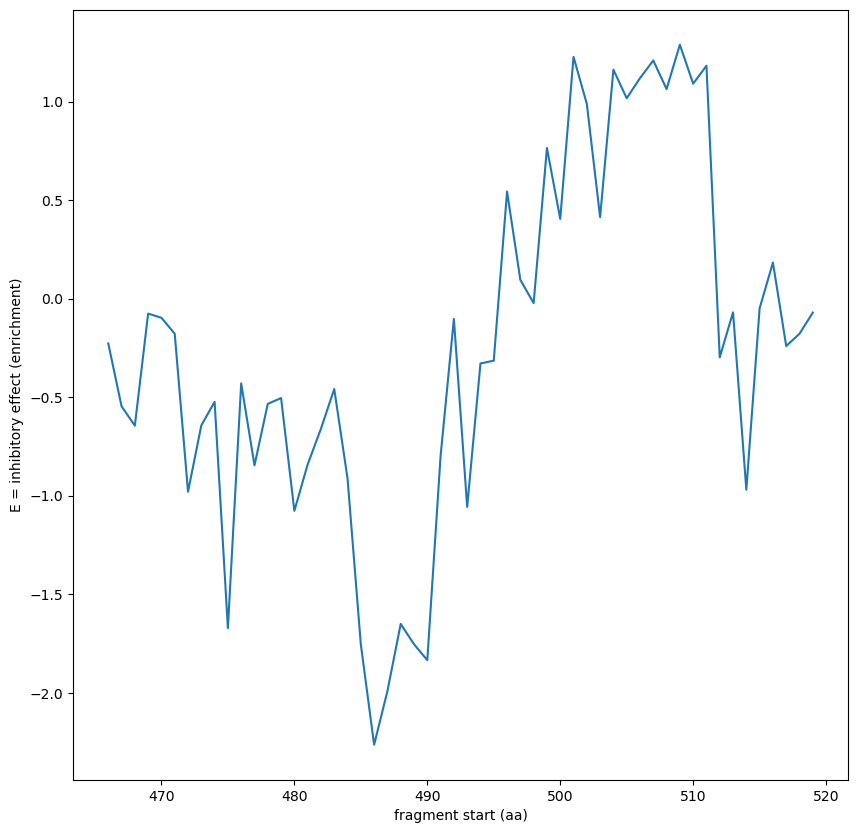

In [66]:
sns.lineplot(data=exp_df[(exp_df['gene']=='groL-coding-EcoliBL21DE3')&(exp_df['fragment length (aa)']==30)&(exp_df['fragment center (aa)']>480)],
            x='fragment start (aa)',y='E = inhibitory effect (enrichment)')

In [67]:
exp_df[(exp_df['gene']=='groL-coding-EcoliBL21DE3')&(exp_df['fragment length (aa)']==30)&(exp_df['fragment center (aa)']>480)].sort_values(by='E = inhibitory effect (enrichment)')

gene                           fragment ID  \
4385  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1456_1545_+   
4387  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1459_1548_+   
4393  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1468_1557_+   
4383  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1453_1542_+   
4391  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1465_1554_+   
4362  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1423_1512_+   
4389  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1462_1551_+   
4373  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1438_1527_+   
4400  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1477_1566_+   
4356  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1414_1503_+   
4429  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1540_1629_+   
4381  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1450_1539_+   
4366  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1429_1518_+   
4375  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1441_1530_+   
4395  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1471_1560_+   
4377  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1444_1533_+   
4348  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1402_1491_+   
4358  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1417_1506_+   
4346  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1399_1488_+   
4369  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1432_1521_+   
4360  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1420_1509_+   
4371  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1435_1524_+   
4379  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1447_1536_+   
4364  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1426_1515_+   
4402  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1480_1569_+   
4404  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1483_1572_+   
4427  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1534_1623_+   
4432  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1549_1638_+   
4344  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1396_1485_+   
4433  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1552_1641_+   
4354  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1411_1500_+   
4398  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1474_1563_+   
4352  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1408_1497_+   
4350  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1405_1494_+   
4434  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1555_1644_+   
4428  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1537_1626_+   
4430  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1543_1632_+   
4410  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1492_1581_+   
4408  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1489_1578_+   
4431  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1546_1635_+   
4414  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1498_1587_+   
4417  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1507_1596_+   
4406  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1486_1575_+   
4412  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1495_1584_+   
4416  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1504_1593_+   
4419  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1513_1602_+   
4422  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1522_1611_+   
4425  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1528_1617_+   
4420  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1516_1605_+   
4418  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1510_1599_+   
4426  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1531_1620_+   
4421  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1519_1608_+   
4415  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1501_1590_+   
4424  groL-coding-EcoliBL21DE3  groL-coding-EcoliBL21DE3_1525_1614_+   

      fragment start (aa)  fragment end (aa)  fragment center (aa

## merge predicted and experimental dataframes

In [5]:
df['gene'] = df['fragment_name'].apply(lambda x: x.split('_')[-2])
print(df['gene'].unique())
df = df.replace({
    'folA':'folA-coding-EcoliBL21DE3',
    'FtsZ':'ftsZ-coding-EcoliBL21DE3',
    'groEL':'groL-coding-EcoliBL21DE3',
    'gyrA':'gyrA-coding-EcoliBL21DE3',
    'lptG':'lptG-coding-EcoliBL21DE3',
    'rpIL':'rpIL-coding-EcoliBL21DE3',
    'rplL':'rpIL-coding-EcoliBL21DE3',
    'ssb':'ssb-coding-EcoliBL21DE3'
})
df.head()

['folA' 'FtsZ' 'groEL' 'gyrA' 'lptG' 'rpIL' 'rplL' 'ssb']


fragment_name  fragment start (aa)  fragment center (aa)  \
0   folA_1-159_folA_7-36                    7                  21.5   
1   folA_1-159_folA_8-37                    8                  22.5   
2   folA_1-159_folA_9-38                    9                  23.5   
3  folA_1-159_folA_10-39                   10                  24.5   
4  folA_1-159_folA_11-40                   11                  25.5   

   fragment end (aa)      iptm      plddt  n_contacts  \
0                 36  0.103046  84.774000           0   
1                 37  0.105501  86.700667           0   
2                 38  0.123415  83.461667           1   
3                 39  0.123641  83.581000           2   
4                 40  0.143685  83.008667           1   

                                                path _merge  \
0  /data1/groups/keatinglab/swans/savinovCollabor...   both   
1  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2  /data1/groups/keatinglab/swans/savinovCollabor...   both   
3  /data1/groups/keatinglab/swans/savinovCollabor...   both   
4  /data1/groups/keatinglab/swans/savinovCollabor...   both   

   weighted_contacts                      gene          condition  
0           0.000000  folA-coding-EcoliBL21DE3  30aa_monomer_folA  
1           0.000000  folA-coding-EcoliBL21DE3  30aa_monomer_folA  
2           0.123415  folA-coding-EcoliBL21DE3  30aa_monomer_folA  
3           0.247281  folA-coding-EcoliBL21DE3  30aa_monomer_folA  
4           0.143685  folA-coding-EcoliBL21DE3  30aa_monomer_folA

In [6]:
df.groupby(['gene','condition','fragment start (aa)','fragment center (aa)','fragment end (aa)']).ngroups

4621

In [7]:
merge_on_list = ['gene','fragment start (aa)','fragment center (aa)','fragment end (aa)']
exp_30_df = exp_df[(exp_df['fragment length (aa)']==30)|(exp_df['fragment length (aa)']==14)]
merge_df = df.merge(exp_30_df,how='left',on=merge_on_list,validate='many_to_one',suffixes=('', '_shorter'))
merge_df

fragment_name  fragment start (aa)  fragment center (aa)  \
0             folA_1-159_folA_7-36                    7                  21.5   
1             folA_1-159_folA_8-37                    8                  22.5   
2             folA_1-159_folA_9-38                    9                  23.5   
3            folA_1-159_folA_10-39                   10                  24.5   
4            folA_1-159_folA_11-40                   11                  25.5   
...                            ...                  ...                   ...   
4616  ssb4copies_1-178_ssb_145-174                  145                 159.5   
4617  ssb4copies_1-178_ssb_146-175                  146                 160.5   
4618  ssb4copies_1-178_ssb_147-176                  147                 161.5   
4619  ssb4copies_1-178_ssb_148-177                  148                 162.5   
4620  ssb4copies_1-178_ssb_149-178                  149                 163.5   

      fragment end (aa)      iptm      plddt  n_contacts  \
0                    36  0.103046  84.774000           0   
1                    37  0.105501  86.700667           0   
2                    38  0.123415  83.461667           1   
3                    39  0.123641  83.581000           2   
4                    40  0.143685  83.008667           1   
...                 ...       ...        ...         ...   
4616                174  0.689092  35.271667           0   
4617                175  0.687369  36.244667           0   
4618                176  0.683096  31.469667           1   
4619                177  0.690097  34.799667           2   
4620                178  0.693337  35.706000           2   

                                                   path _merge  \
0     /data1/groups/keatinglab/swans/savinovCollabor...   both   
1     /data1/groups/keatinglab/swans/savinovCollabor...   both   
2     /data1/groups/keatinglab/swans/savinovCollabor...   both   
3     /data1/groups/keatinglab/swans/savinovCollabor...   both   
4     /data1/groups/keatinglab/swans/savinovCollabor...   both   
...                                                 ...    ...   
4616  /data1/groups/keatinglab/swans/savinovCollabor...   both   
4617  /data1/groups/keatinglab/swans/savinovCollabor...   both   
4618  /data1/groups/keatinglab/swans/savinovCollabor...   both   
4619  /data1/groups/keatinglab/swans/savinovCollabor...   both   
4620  /data1/groups/keatinglab/swans/savinovCollabor...   both   

      weighted_contacts  ... fragment length (aa)  \
0              0.000000  ...                 30.0   
1              0.000000  ...                 30.0   
2              0.123415  ...                 30.0   
3              0.247281  ...                 30.0   
4              0.143685  ...                 30.0   
...                 ...  ...                  ...   
4616           0.000000  ...                 30.0   
4617           0.000000  ...                 30.0   
4618           0.683096  ...                 30.0   
4619           1.380195  ...                 30.0   
4620           1.386674  ...                 30.0   

     E = inhibitory effect (enrichment)    sem(E)  \
0                             -2.770798  0.451855   
1                             -1.798765  0.569595   
2                             -0.973027  0.270458   
3                             -1.108710  0.243684   
4                             -1.242470  0.046579   
...                                 ...       ...   
4616                          -0.924184  0.048997   
4617                          -0.436107  0.160560   
4618                           0.508135  0.121051   
4619                          -0.399455  0.222227   
4620                          -1.006461  0.140584   

      hydrophobicity_KyteDoolittle_classifier  \
0                                 hydrophobic   
1                                 hydrophilic   
2                                 hydrophilic   
3                                 hydrophilic   
4              

# Prepare structures for analysis

In [8]:
path = '/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction/data/PPI_inhibitory_fragment_peaks_AS_230114.csv'
as_peaks_df = pd.read_csv(path)
as_peaks_df.head(20)

protein-coding gene  \
0                 gyrA   
1                 gyrA   
2                 ftsZ   
3                 ftsZ   
4                 ftsZ   
5                 ftsZ   
6                 ftsZ   
7                 rplL   
8                 rplL   
9                  ssb   
10                 ssb   
11                 ssb   
12                groL   
13                groL   
14                groL   
15                groL   
16                groL   
17                groL   
18                lptG   
19                 NaN   

    protein-protein interaction inhibitory peak center (aa)  \
0                                                26.5         
1                                               385.5         
2                                               130.5         
3                                               177.5         
4                                               200.5         
5                                               272.5         
6                                               367.5         
7                                                19.5         
8                                                19.5         
9                                                66.5         
10                                               66.5         
11                                               66.5         
12                                               17.5         
13                                              101.5         
14                                              243.5         
15                                              260.5         
16                                              445.5         
17                                              500.5         
18                                              323.5         
19                                                NaN         

    30 aa fragment start (aa)  30 aa fragment end (aa)  \
0                        12.0                     41.0   
1                       371.0                    400.0   
2                       116.0                    145.0   
3                       163.0                    192.0   
4                       186.0                    215.0   
5                       258.0                    287.0   
6                       353.0                    382.0   
7                         5.0                     34.0   
8                         5.0                     34.0   
9                        52.0                     81.0   
10                       52.0                     81.0   
11                       52.0                     81.0   
12                        3.0                     32.0   
13                       87.0                    116.0   
14                      229.0                    258.0   
15                      246.0                    275.0   
16                      431.0                    460.0   
17                      486.0                    515.0   
18                      309.0                    338.0   
19                        NaN                      NaN   

   protein-protein interaction partner gene(s) Experimental structure name  \
0                                         gyrB    6rks_gyrA_AC_gyrB_BD.pdb   
1                                         gyrA    6rks_gyrA_AC_gyrB_BD.pdb   
2                                         ftsZ           6unx_ftsZ_ABC.pdb   
3                                         ftsZ           6unx_ftsZ_ABC.pdb   
4                                         ftsZ           6unx_ftsZ_ABC.pdb   
5                                         ftsZ           6unx_ftsZ_ABC.pdb   
6                       ftsZ, ftsA, zipA, minC                         NaN   
7                                         rplJ      3j7z_rplL_6_rplJ_5.pdb   
8                                         rplL            1rqu_rplL_AB.pdb   
9                                          ssb           1eqq_ssb_ABCD.pdb   
10                                  ssb2copies         

In [62]:
as_peaks_df[as_peaks_df['protein-coding gene']=='groL']

protein-coding gene  \
12                groL   
13                groL   
14                groL   
15                groL   
16                groL   
17                groL   

    protein-protein interaction inhibitory peak center (aa)  \
12                                               17.5         
13                                              101.5         
14                                              243.5         
15                                              260.5         
16                                              445.5         
17                                              500.5         

    30 aa fragment start (aa)  30 aa fragment end (aa)  \
12                        3.0                     32.0   
13                       87.0                    116.0   
14                      229.0                    258.0   
15                      246.0                    275.0   
16                      431.0                    460.0   
17                      486.0                    515.0   

   protein-protein interaction partner gene(s) Experimental structure name  \
12                                        groL    1aon_groEL_POUBAGHNM.pdb   
13                                        groL    1aon_groEL_POUBAGHNM.pdb   
14                                        groS    1aon_groEL_POUBAGHNM.pdb   
15                                        groS    1aon_groEL_POUBAGHNM.pdb   
16                                        groL    1aon_groEL_POUBAGHNM.pdb   
17                                        groL    1aon_groEL_POUBAGHNM.pdb   

   Protein chain in structure Fragment chain in structure  \
12                        B,G                           A   
13                        B,H                           A   
14                          O                           A   
15                        O,G                           A   
16                          ?                           A   
17                          B                           A   

   overlap with Ncontacts peak?  Ncontacts peak center Overlap degree (aa)  \
12           yes (groL, 1 copy)                   15.5                  28   
13           yes (groL, 1 copy)                  106.5                  25   
14           yes (groS, 1 copy)                  252.5                  21   
15           yes (groS, 1 copy)                  260.5                  30   
16           yes (groL, 1 copy)                  464.5                  11   
17           yes (groL, 1 copy)                  514.5                  16   

    Ncontacts value  weighted contacts peak center  weighted contacts value  \
12              5.0                           15.5                      4.4   
13              5.0                          106.5                      4.3   
14             10.0                          252.5                      4.0   
15              8.0                          260.5                      5.1   
16              2.0                          464.5                      1.6   
17             16.0                          514.5                     14.0   

                                                notes  
12  maps to GroEL homomeric heptamer-heptamer inte...  
13  maps to GroEL homomeric heptamer-heptamer inte...  
14      maps to GroEL ring interface with GroES ring   
15      maps to GroEL ring interface with GroES ring   
16  maps to GroEL homomeric heptamer-heptamer inte...  
17  maps to GroEL homomeric heptamer-heptamer inte...

# gyrA - gyrB

In [9]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6rks_gyrA_AC_gyrB_BD.pdb'
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'B':resRange(),'A':resRange(12,41)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

15
['A_27-B_501', 'A_24-B_505', 'A_13-B_768', 'A_18-B_789', 'A_13-B_766', 'A_12-B_763', 'A_20-B_504', 'A_14-B_766', 'A_24-B_501', 'A_12-B_764', 'A_21-B_508', 'A_24-B_502', 'A_32-B_502', 'A_12-B_765', 'A_12-B_766']


In [10]:
path = structure_dir_path+'6rks_gyrA_AC_gyrB_BD.pdb'
gene_name = 'gyrA-coding-EcoliBL21DE3'
frag_aa_start = [12]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_gyrB')].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_gyrB')].copy(deep=True)
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(12,41),'B':resRange()})
    #rename chains
    s_extract[0]['A'].id = 'X'
    s_extract[0]['B'].id = 'A'
    s_extract[0]['X'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"{bindingres_rec[1]} binding site residues and {bindingres_rec[0]} recovery")
        print(f"pred fragment {row_pred['fragment_name']} has {len(pred_contacts)} contacts and {rec} recovery")
        rec_list.append(rec[0])
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(1,len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingres_rec_list,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

gyrB1copies_1-804_gyrA_12-41 12
experimental fragment gyrB1copies_1-804_gyrA_12-41 has 15 contacts
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_1-30 has 66 contacts and (6, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_2-31 has 65 contacts and (7, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_3-32 has 67 contacts and (6, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_4-33 has 64 contacts and (6, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_5-34 has 61 contacts and (6, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_6-35 has 56 contacts and (7, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-804_gyrA_7-36 has 54 contacts and (7, 15) recovery
11 binding site residues and 9 recovery
pred fragment gyrB1copies_1-

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_69-98 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_70-99 has 4 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_71-100 has 7 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_72-101 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_73-102 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_74-103 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_75-104 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_76-105 has 9 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pr

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_137-166 has 12 contacts and (0, 15) recovery
11 binding site residues and 2 recovery
pred fragment gyrB1copies_1-804_gyrA_138-167 has 5 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_139-168 has 12 contacts and (0, 15) recovery
11 binding site residues and 2 recovery
pred fragment gyrB1copies_1-804_gyrA_140-169 has 9 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_141-170 has 10 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_142-171 has 7 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_143-172 has 10 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_144-173 has 8 contacts and (0, 15) recovery
11 binding site residues and

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_205-234 has 35 contacts and (0, 15) recovery
11 binding site residues and 3 recovery
pred fragment gyrB1copies_1-804_gyrA_206-235 has 18 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_207-236 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_208-237 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_209-238 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_210-239 has 9 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_211-240 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_212-241 has 3 contacts and (0, 15) recovery
11 binding site residues and 0

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_273-302 has 6 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_274-303 has 6 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_275-304 has 8 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_276-305 has 6 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_277-306 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_278-307 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_279-308 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_280-309 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 reco

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_341-370 has 14 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_342-371 has 6 contacts and (0, 15) recovery
11 binding site residues and 2 recovery
pred fragment gyrB1copies_1-804_gyrA_343-372 has 14 contacts and (0, 15) recovery
11 binding site residues and 3 recovery
pred fragment gyrB1copies_1-804_gyrA_344-373 has 13 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_345-374 has 12 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_346-375 has 7 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_347-376 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_348-377 has 3 contacts and (0, 15) recovery
11 binding site residues and

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_409-438 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_410-439 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_411-440 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_412-441 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_413-442 has 1 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_414-443 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_415-444 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_416-445 has 5 contacts and (0, 15) recovery
11 binding site residues and 1 re

11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_477-506 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_478-507 has 1 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_479-508 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_480-509 has 0 contacts and (0, 0) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_481-510 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_482-511 has 6 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_483-512 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_484-513 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 re

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_545-574 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_546-575 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_547-576 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_548-577 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_549-578 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_550-579 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_551-580 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_552-581 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 re

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_613-642 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_614-643 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_615-644 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_616-645 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_617-646 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_618-647 has 7 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_619-648 has 6 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_620-649 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 r

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_681-710 has 7 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_682-711 has 4 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_683-712 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_684-713 has 5 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_685-714 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_686-715 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_687-716 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_688-717 has 0 contacts and (0, 0) recovery
11 binding site residues and 1 re

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_749-778 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_750-779 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_751-780 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_752-781 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_753-782 has 4 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_754-783 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_755-784 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_756-785 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 re

11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_817-846 has 1 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_818-847 has 2 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_819-848 has 1 contacts and (0, 15) recovery
11 binding site residues and 1 recovery
pred fragment gyrB1copies_1-804_gyrA_820-849 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_821-850 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_822-851 has 3 contacts and (0, 15) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_823-852 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 recovery
pred fragment gyrB1copies_1-804_gyrA_824-853 has 0 contacts and (0, 0) recovery
11 binding site residues and 0 reco

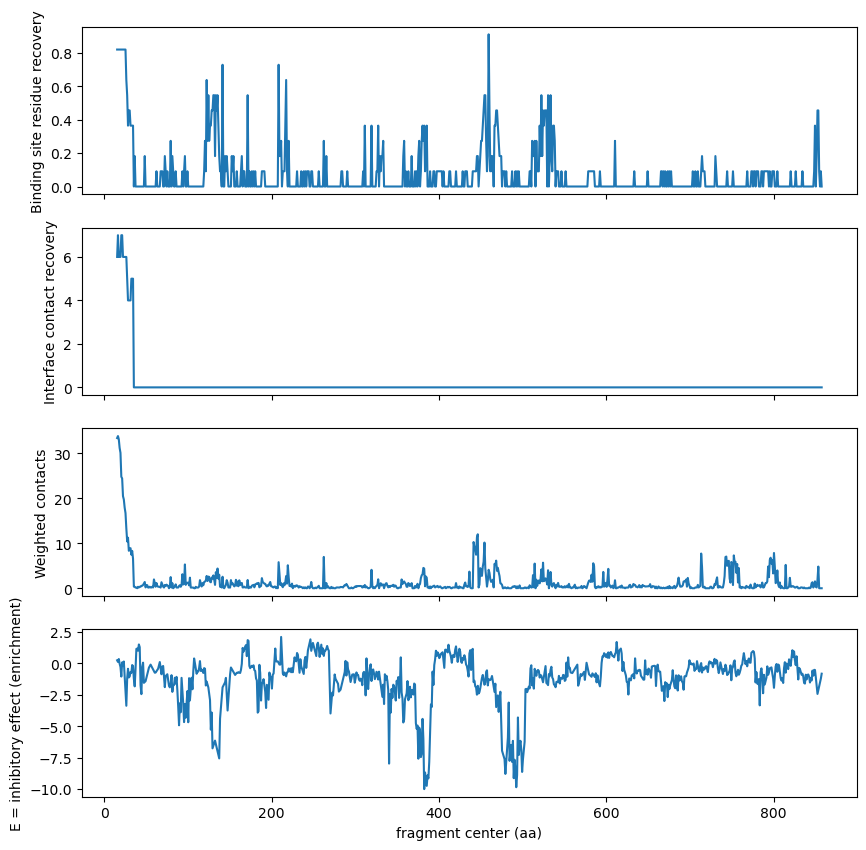

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_gyrA-gyrB.png',dpi=300)

In [50]:
pred_df[pred_df['fragment center (aa)']<150.0]

fragment_name  fragment start (aa)  \
2484     gyrB1copies_1-804_gyrA_1-30                    1   
2485     gyrB1copies_1-804_gyrA_2-31                    2   
2486     gyrB1copies_1-804_gyrA_3-32                    3   
2487     gyrB1copies_1-804_gyrA_4-33                    4   
2488     gyrB1copies_1-804_gyrA_5-34                    5   
...                              ...                  ...   
2614  gyrB1copies_1-804_gyrA_131-160                  131   
2615  gyrB1copies_1-804_gyrA_132-161                  132   
2616  gyrB1copies_1-804_gyrA_133-162                  133   
2617  gyrB1copies_1-804_gyrA_134-163                  134   
2618  gyrB1copies_1-804_gyrA_135-164                  135   

      fragment center (aa)  fragment end (aa)      iptm      plddt  \
2484                  15.5                 30  0.926929  81.637000   
2485                  16.5                 31  0.939134  83.196333   
2486                  17.5                 32  0.945074  84.914667   
2487                  18.5                 33  0.944492  85.615000   
2488                  19.5                 34  0.939872  84.161667   
...                    ...                ...       ...        ...   
2614                 145.5                160  0.150258  68.432667   
2615                 146.5                161  0.224843  69.777333   
2616                 147.5                162  0.206652  72.566333   
2617                 148.5                163  0.152374  77.221000   
2618                 149.5                164  0.235279  70.728333   

      n_contacts                                               path _merge  \
2484          36  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2485          36  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2486          35  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2487          33  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2488          32  /data1/groups/keatinglab/swans/savinovCollabor...   both   
...          ...                                                ...    ...   
2614           5  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2615           8  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2616           6  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2617           1  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2618           1  /data1/groups/keatinglab/swans/savinovCollabor...   both   

      weighted_contacts  ...    sem(E)  \
2484          33.369462  ...  0.224064   
2485          33.808818  ...  0.280951   
2486          33.077595  ...  0.222519   
2487          31.168226  ...  0.264611   
2488          30.075894  ...  0.110649   
...                 ...  ...       ...   
2614           0.751288  ...  0.155768   
2615           1.798746  ...       NaN   
2616           1.239909  ...  1.667332   
2617           0.152374  ...       NaN   
2618           0.235279  ...       NaN   

     hydrophobicity_KyteDoolittle_classifier  \
2484                             hydrophobic   
2485                             hydrophobic   
2486                             hydrophilic   
2487                             hydrophobic   
2488                             hydrophobic   
...                                      ...   
2614                             hydrophilic   
2615                                     NaN   
2616                             hydrophilic   
2617                                     NaN   
2618                                     NaN   

     instabIndex_Guruprasad_classifier  charge_Lehninger_classifier  \
2484                          unstable                     negative   
2485                          unstable                     negative   
2486                          unstable                     negative   
2487                          unstable                     negative   
2488                          unstable                     negative   
... 

# gyrA - gyrA

In [21]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6rks_gyrA_AC_gyrB_BD.pdb'
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'C':resRange(),'A':resRange(371,400)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'C'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

4
['A_397-C_466', 'A_397-C_463', 'A_397-C_467', 'A_394-C_394']


In [27]:
path = structure_dir_path+'6rks_gyrA_AC_gyrB_BD.pdb'
gene_name = 'gyrA-coding-EcoliBL21DE3'
frag_aa_start = [371]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_gyrA')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)&(merge_df['condition']=='30aa_monomer_gyrA')]
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(371,400),'C':resRange()})
    #rename chains
    s_extract[0]['A'].id = 'X'
    s_extract[0]['C'].id = 'A'
    s_extract[0]['X'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        print(f"pred fragment {row_pred['fragment_name']} has {len(pred_contacts)} contacts and {rec} recovery")
        rec_list.append(rec[0])
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(1,len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'])
# # plt.savefig(f"230128_fstZ_contactrecovery_fragments1.5weightedcontacts_6unx.png",dpi=300)

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

gyrA_1-872_gyrA_371-400 371
experimental fragment gyrA_1-872_gyrA_371-400 has 4 contacts
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_1-30 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_2-31 has 2 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_3-32 has 4 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_4-33 has 7 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_5-34 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_6-35 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_7-36 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_8-37 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery


4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_75-104 has 8 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_76-105 has 3 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_77-106 has 3 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_78-107 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_79-108 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_80-109 has 2 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_81-110 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_82-111 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_83-112 has 0 contacts and (0, 0) recovery
4

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_149-178 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_150-179 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_151-180 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_152-181 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_153-182 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_154-183 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_155-184 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_156-185 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_157-186 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_224-253 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_225-254 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_226-255 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_227-256 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_228-257 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_229-258 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_230-259 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_231-260 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_232-261 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_298-327 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_299-328 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_300-329 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_301-330 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_302-331 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_303-332 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_304-333 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_305-334 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_306-335 has 4 contacts and (0, 4) r

4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_372-401 has 9 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_373-402 has 10 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_374-403 has 14 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_375-404 has 13 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_376-405 has 12 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_377-406 has 15 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_378-407 has 14 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_379-408 has 16 contacts and (3, 4) recovery
4 binding site contacts and 4 recovery
pred fragment gyrA_1-872_gyrA_380-409 has 14 contacts and 

4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_446-475 has 32 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_447-476 has 32 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_448-477 has 32 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_449-478 has 31 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_450-479 has 33 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_451-480 has 31 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_452-481 has 32 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_453-482 has 32 contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_454-483 has 32 contacts and

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_519-548 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_520-549 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_521-550 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_522-551 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_523-552 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_524-553 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_525-554 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_526-555 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_527-556 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_592-621 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_593-622 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_594-623 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_595-624 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_596-625 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_597-626 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_598-627 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_599-628 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_600-629 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_666-695 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_667-696 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_668-697 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_669-698 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_670-699 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_671-700 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_672-701 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_673-702 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_674-703 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_740-769 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_741-770 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_742-771 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_743-772 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_744-773 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_745-774 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_746-775 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_747-776 has 0 contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_748-777 has 0 contacts and (0, 0) r

4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_815-844 has 4 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_816-845 has 1 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_817-846 has 12 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_818-847 has 9 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_819-848 has 3 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_820-849 has 15 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_821-850 has 6 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_822-851 has 14 contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_823-852 has 11 contacts and (0, 

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


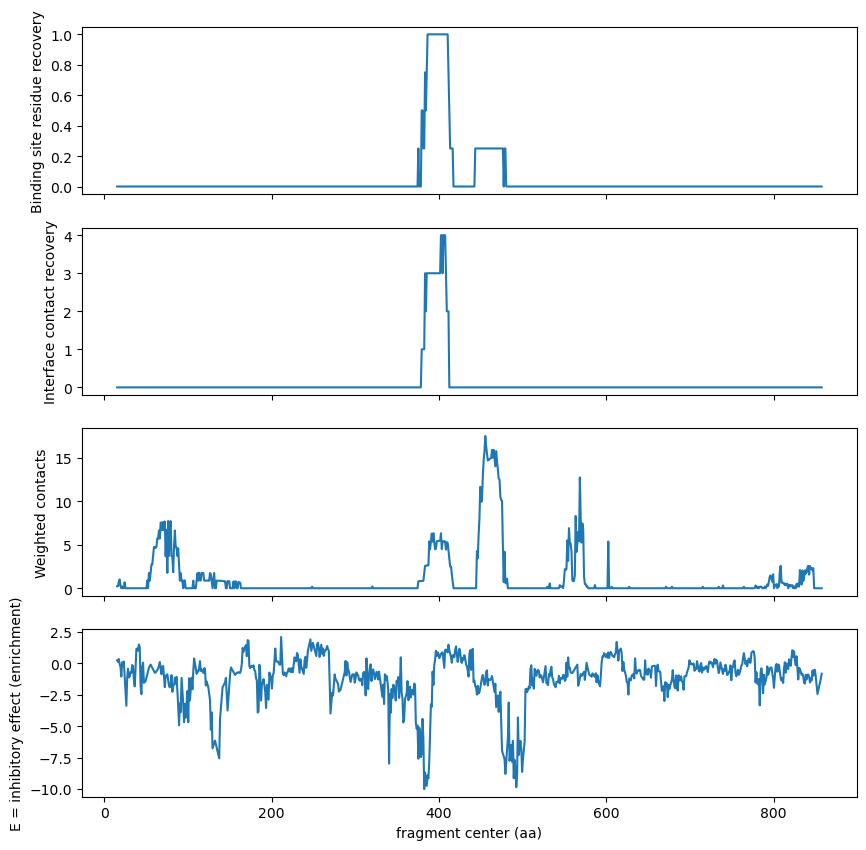

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_gyrA-gyrA.png',dpi=300)

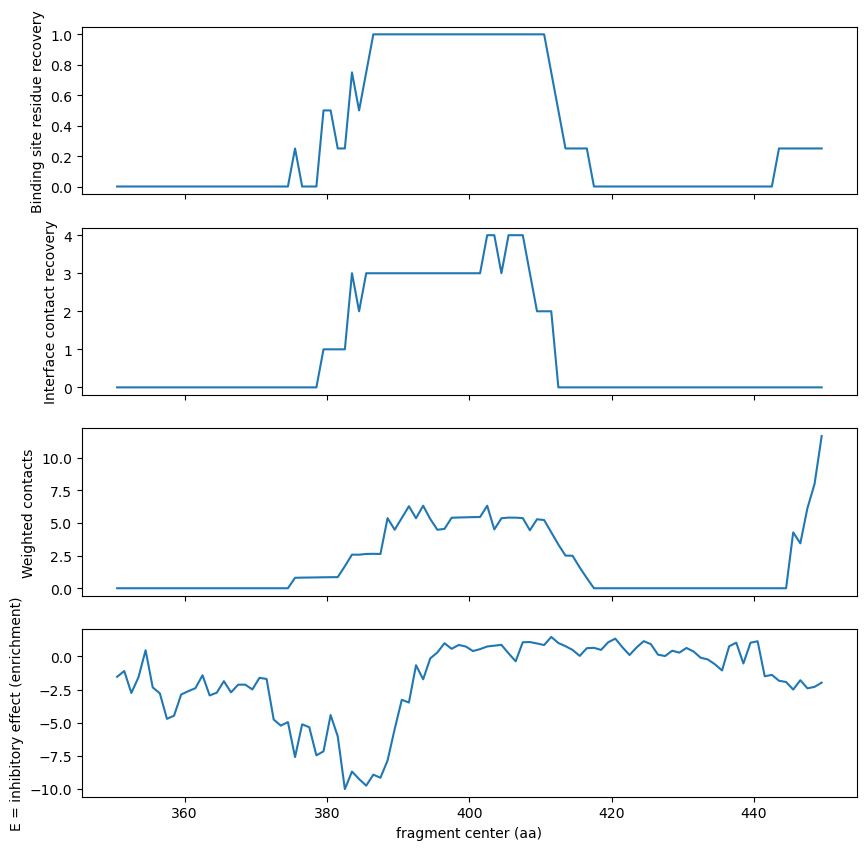

In [34]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

pred_df_filt = pred_df[(pred_df['fragment center (aa)']>350)&(pred_df['fragment center (aa)']<450)]

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_gyrA-gyrA_fragcenter350-450.png',dpi=300)

## Repeat with different fragment center

In [38]:
path = structure_dir_path+'6rks_gyrA_AC_gyrB_BD.pdb'
gene_name = 'gyrA-coding-EcoliBL21DE3'
frag_aa_start = [372]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_gyrA')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)&(merge_df['condition']=='30aa_monomer_gyrA')]
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(372,401),'C':resRange()})
    #rename chains
    s_extract[0]['A'].id = 'X'
    s_extract[0]['C'].id = 'A'
    s_extract[0]['X'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        print(f"pred fragment {row_pred['fragment_name']} has {len(pred_contacts)} contacts and {rec} recovery")
        rec_list.append(rec[0])
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(1,len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'])
# # plt.savefig(f"230128_fstZ_contactrecovery_fragments1.5weightedcontacts_6unx.png",dpi=300)

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

gyrA_1-872_gyrA_372-401 372
experimental fragment gyrA_1-872_gyrA_372-401 has 7 contacts
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_1-30 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_2-31 has 2 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_3-32 has 4 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_4-33 has 7 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_5-34 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_6-35 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_7-36 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_8-37 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery


6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_75-104 has 8 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_76-105 has 3 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_77-106 has 3 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_78-107 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_79-108 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_80-109 has 2 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_81-110 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_82-111 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_83-112 has 0 contacts and (0, 0) recovery
6

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_149-178 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_150-179 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_151-180 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_152-181 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_153-182 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_154-183 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_155-184 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_156-185 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_157-186 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_223-252 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_224-253 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_225-254 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_226-255 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_227-256 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_228-257 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_229-258 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_230-259 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_231-260 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_297-326 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_298-327 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_299-328 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_300-329 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_301-330 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_302-331 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_303-332 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_304-333 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_305-334 has 0 contacts and (0, 0) r

6 binding site contacts and 3 recovery
pred fragment gyrA_1-872_gyrA_371-400 has 6 contacts and (3, 7) recovery
6 binding site contacts and 5 recovery
pred fragment gyrA_1-872_gyrA_372-401 has 9 contacts and (3, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_373-402 has 10 contacts and (4, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_374-403 has 14 contacts and (4, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_375-404 has 13 contacts and (4, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_376-405 has 12 contacts and (4, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_377-406 has 15 contacts and (5, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_378-407 has 14 contacts and (5, 7) recovery
6 binding site contacts and 6 recovery
pred fragment gyrA_1-872_gyrA_379-408 has 16 contacts and (

6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_444-473 has 33 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_445-474 has 31 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_446-475 has 32 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_447-476 has 32 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_448-477 has 32 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_449-478 has 31 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_450-479 has 33 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_451-480 has 31 contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
pred fragment gyrA_1-872_gyrA_452-481 has 32 contacts and

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_517-546 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_518-547 has 5 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_519-548 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_520-549 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_521-550 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_522-551 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_523-552 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_524-553 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_525-554 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_591-620 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_592-621 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_593-622 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_594-623 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_595-624 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_596-625 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_597-626 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_598-627 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_599-628 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_665-694 has 2 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_666-695 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_667-696 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_668-697 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_669-698 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_670-699 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_671-700 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_672-701 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_673-702 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_740-769 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_741-770 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_742-771 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_743-772 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_744-773 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_745-774 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_746-775 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_747-776 has 0 contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_748-777 has 0 contacts and (0, 0) r

6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_814-843 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_815-844 has 4 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_816-845 has 1 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_817-846 has 12 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_818-847 has 9 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_819-848 has 3 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_820-849 has 15 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_821-850 has 6 contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
pred fragment gyrA_1-872_gyrA_822-851 has 14 contacts and (0, 7

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


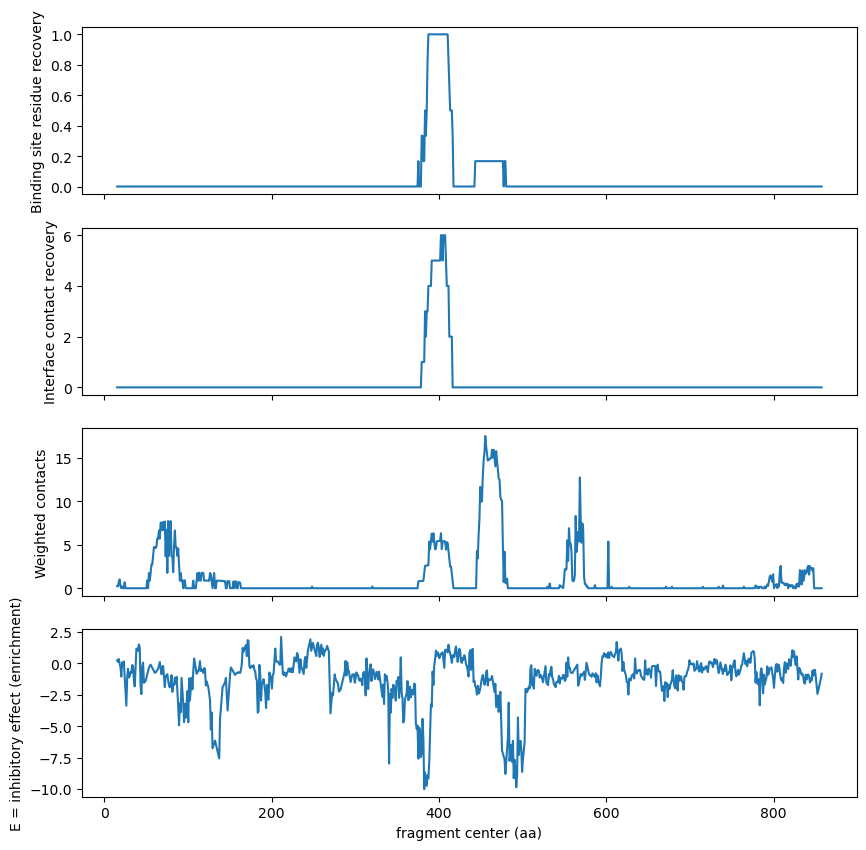

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_gyrA-gyrA.png',dpi=300)

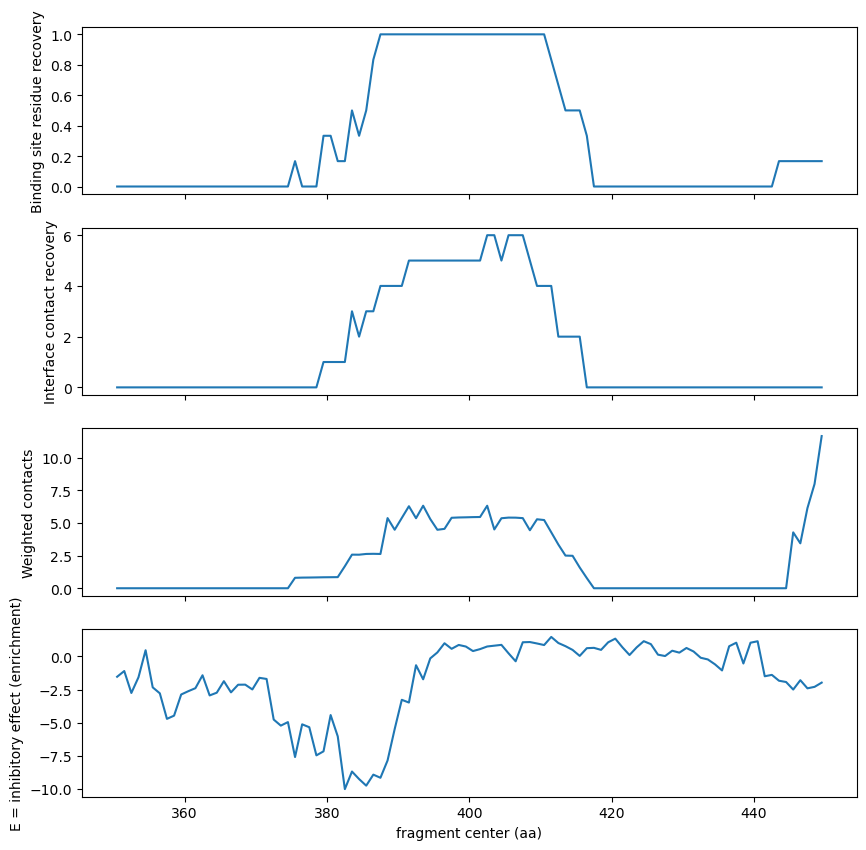

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

pred_df_filt = pred_df[(pred_df['fragment center (aa)']>350)&(pred_df['fragment center (aa)']<450)]

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df_filt,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_gyrA-gyrA_fragcenter350-450.png',dpi=300)

# ftsZ - ftsZ

In [43]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
interface_contacts_list = []
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'B':resRange(),'A':resRange(116,145)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

4
['A_137-B_275', 'A_142-B_209', 'A_141-B_212', 'A_137-B_272']


In [49]:
path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
gene_name = 'ftsZ-coding-EcoliBL21DE3'
# frag_aa_start = [116,163]
frag_aa_start = [116]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)]
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'C':resRange(row['fragment start (aa)'],row['fragment end (aa)'])})
    s_extract[0]['C'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['A'],10)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

FtsZ_10-316_FtsZ_116-145 116
experimental fragment FtsZ_10-316_FtsZ_116-145 has 4 contacts
pred fragment FtsZ_10-316_FtsZ_1-30 has 
5 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_2-31 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_3-32 has 
8 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_4-33 has 
8 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_5-34 has 
7 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_6-35 has 
7 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_7-36 has 
9 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_8-37 has 
9 interface contacts

pred fragment FtsZ_10-316_FtsZ_68-97 has 
9 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_69-98 has 
6 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_70-99 has 
4 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_71-100 has 
5 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_72-101 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_73-102 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_74-103 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_75-104 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_

pred fragment FtsZ_10-316_FtsZ_135-164 has 
8 interface contacts and (1, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_136-165 has 
5 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_137-166 has 
4 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_138-167 has 
2 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_139-168 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_140-169 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_141-170 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_142-171 has 
2 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fra

pred fragment FtsZ_10-316_FtsZ_201-230 has 
17 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_202-231 has 
16 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_203-232 has 
19 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_204-233 has 
14 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_205-234 has 
19 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_206-235 has 
16 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_207-236 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_208-237 has 
9 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
p

pred fragment FtsZ_10-316_FtsZ_267-296 has 
23 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_268-297 has 
20 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_269-298 has 
18 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_270-299 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_271-300 has 
24 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_272-301 has 
17 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_273-302 has 
16 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_274-303 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery


pred fragment FtsZ_10-316_FtsZ_333-362 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_334-363 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_335-364 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_336-365 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_337-366 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_338-367 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_339-368 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_340-369 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fra

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


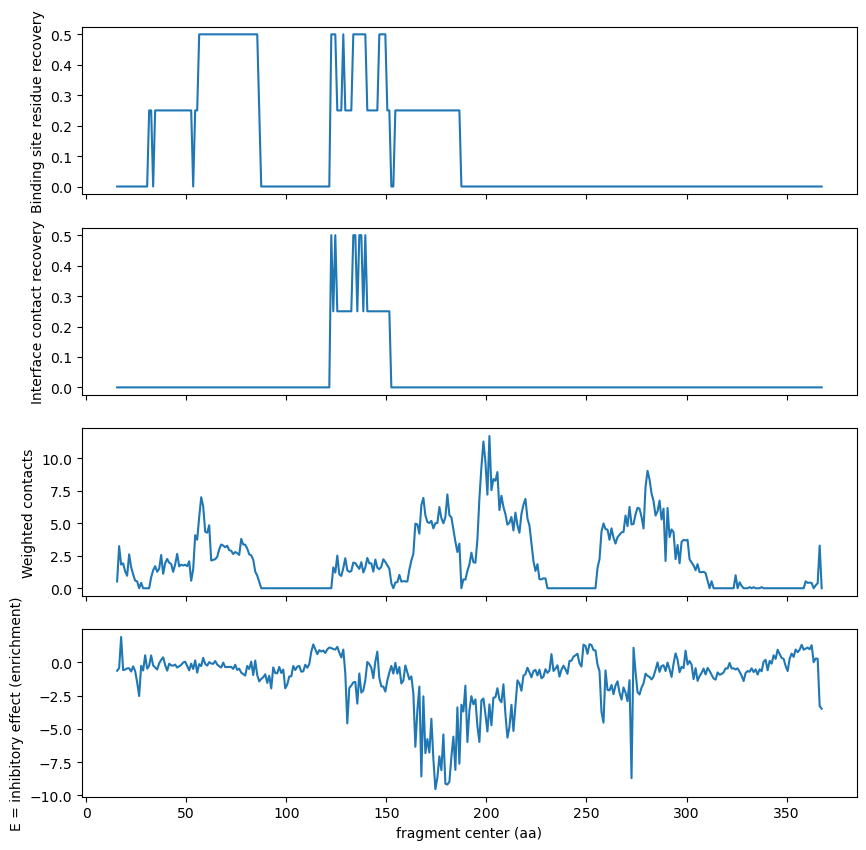

In [51]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ftsZ-fstZ_116-145.png',dpi=300)

In [52]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
interface_contacts_list = []
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(),'C':resRange(163,192)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'C'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

8
['A_271-C_174', 'A_273-C_174', 'A_205-C_178', 'A_276-C_172', 'A_272-C_172', 'A_272-C_181', 'A_273-C_173', 'A_273-C_172']


In [53]:
path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
gene_name = 'ftsZ-coding-EcoliBL21DE3'
# frag_aa_start = [116,163]
frag_aa_start = [163]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)]
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'C':resRange(row['fragment start (aa)'],row['fragment end (aa)'])})
    s_extract[0]['C'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['A'],10)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

FtsZ_10-316_FtsZ_163-192 163
experimental fragment FtsZ_10-316_FtsZ_163-192 has 8 contacts
pred fragment FtsZ_10-316_FtsZ_1-30 has 
5 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_2-31 has 
15 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_3-32 has 
8 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_4-33 has 
8 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_5-34 has 
7 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_6-35 has 
7 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_7-36 has 
9 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_8-37 has 
9 interface contacts

pred fragment FtsZ_10-316_FtsZ_68-97 has 
9 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_69-98 has 
6 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_70-99 has 
4 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_71-100 has 
5 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_72-101 has 
1 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_73-102 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_74-103 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_75-104 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_

pred fragment FtsZ_10-316_FtsZ_136-165 has 
5 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_137-166 has 
4 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_138-167 has 
2 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_139-168 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_140-169 has 
1 interface contacts and (0, 8) recovery
5 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_141-170 has 
1 interface contacts and (0, 8) recovery
5 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_142-171 has 
2 interface contacts and (0, 8) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_143-172 has 
2 interface contacts and (0, 8) recovery
5 binding site contacts and 2 recovery
pred fra

pred fragment FtsZ_10-316_FtsZ_204-233 has 
14 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_205-234 has 
19 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_206-235 has 
16 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_207-236 has 
15 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_208-237 has 
9 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_209-238 has 
8 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_210-239 has 
7 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_211-240 has 
7 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred

pred fragment FtsZ_10-316_FtsZ_271-300 has 
24 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_272-301 has 
17 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_273-302 has 
16 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_274-303 has 
15 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_275-304 has 
10 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_276-305 has 
15 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_277-306 has 
12 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_278-307 has 
13 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery


pred fragment FtsZ_10-316_FtsZ_338-367 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_339-368 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_340-369 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_341-370 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_342-371 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_343-372 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_344-373 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_345-374 has 
7 interface contacts and (0, 8) recovery
5 binding site contacts and 0 recovery
pred fra

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


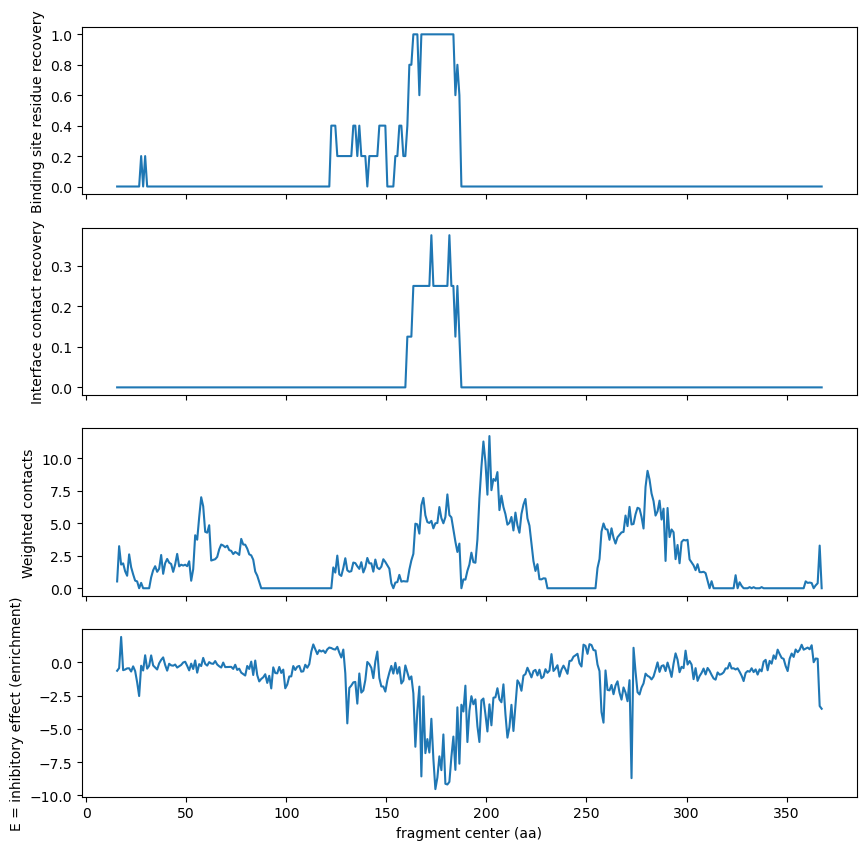

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ftsZ-fstZ_163-192.png',dpi=300)

In [58]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
interface_contacts_list = []
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(),'B':resRange(186,215)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

4
['A_178-B_205', 'A_142-B_209', 'A_141-B_212', 'A_68-B_210']


In [61]:
path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
gene_name = 'ftsZ-coding-EcoliBL21DE3'
# frag_aa_start = [186,258]
frag_aa_start = [186]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)].copy(deep=True)
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'],row['fragment end (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(row['fragment start (aa)'],row['fragment end (aa)'])})
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
#         s_prediction[0]['A'].id = 'X'
#         s_prediction[0]['B'].id = 'A'
#         s_prediction[0]['X'].id = 'C'
        fixResidueNumbers(s_prediction[0]['A'],10)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
#         print([residueContactName(x,y) for x,y in pred_contacts])
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

FtsZ_10-316_FtsZ_186-215 186 215
experimental fragment FtsZ_10-316_FtsZ_186-215 has 4 contacts
pred fragment FtsZ_10-316_FtsZ_1-30 has 
5 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_2-31 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_3-32 has 
8 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_4-33 has 
8 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_5-34 has 
7 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_6-35 has 
7 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_7-36 has 
9 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_8-37 has 
9 interface cont

pred fragment FtsZ_10-316_FtsZ_69-98 has 
6 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_70-99 has 
4 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_71-100 has 
5 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_72-101 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_73-102 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_74-103 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_75-104 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_76-105 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ

pred fragment FtsZ_10-316_FtsZ_136-165 has 
5 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_137-166 has 
4 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_138-167 has 
2 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_139-168 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_140-169 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_141-170 has 
1 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_142-171 has 
2 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_143-172 has 
2 interface contacts and (0, 4) recovery
4 binding site contacts and 0 recovery
pred fra

pred fragment FtsZ_10-316_FtsZ_202-231 has 
16 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_203-232 has 
19 interface contacts and (1, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_204-233 has 
14 interface contacts and (1, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_205-234 has 
19 interface contacts and (1, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_206-235 has 
16 interface contacts and (1, 4) recovery
4 binding site contacts and 3 recovery
pred fragment FtsZ_10-316_FtsZ_207-236 has 
15 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_208-237 has 
9 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_209-238 has 
8 interface contacts and (1, 4) recovery
4 binding site contacts and 1 recovery
pr

pred fragment FtsZ_10-316_FtsZ_270-299 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_271-300 has 
24 interface contacts and (0, 4) recovery
4 binding site contacts and 3 recovery
pred fragment FtsZ_10-316_FtsZ_272-301 has 
17 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_273-302 has 
16 interface contacts and (0, 4) recovery
4 binding site contacts and 3 recovery
pred fragment FtsZ_10-316_FtsZ_274-303 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 3 recovery
pred fragment FtsZ_10-316_FtsZ_275-304 has 
10 interface contacts and (0, 4) recovery
4 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_276-305 has 
15 interface contacts and (0, 4) recovery
4 binding site contacts and 3 recovery
pred fragment FtsZ_10-316_FtsZ_277-306 has 
12 interface contacts and (0, 4) recovery
4 binding site contacts and 3 recovery


pred fragment FtsZ_10-316_FtsZ_338-367 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_339-368 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_340-369 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_341-370 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_342-371 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_343-372 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_344-373 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_345-374 has 
7 interface contacts and (0, 4) recovery
4 binding site contacts and 1 recovery
pred fra

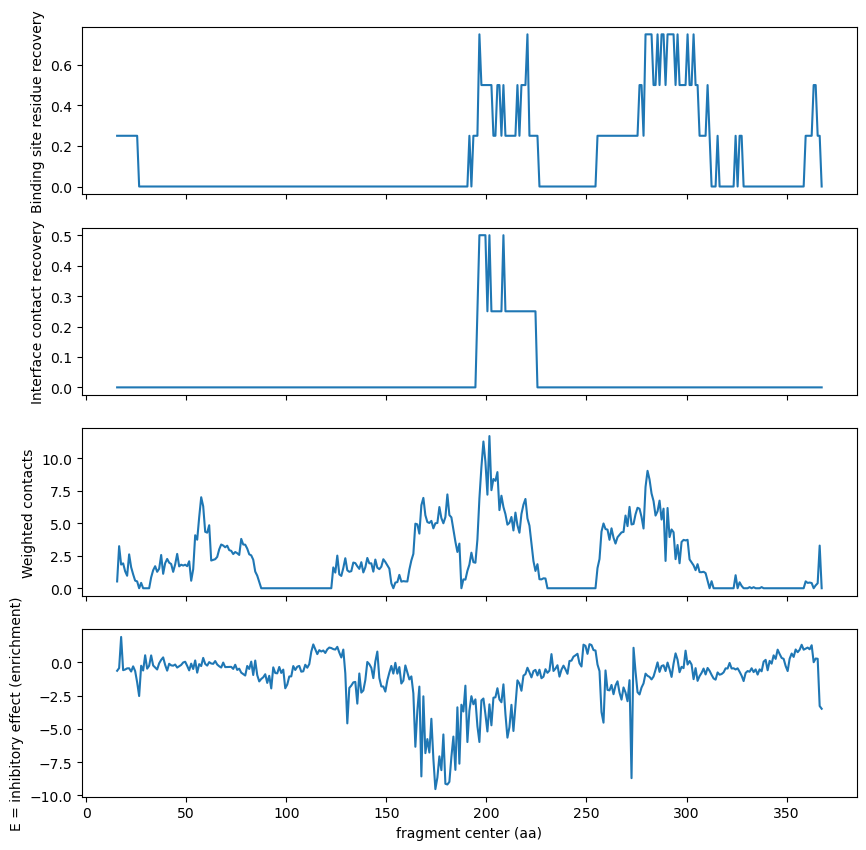

In [62]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ftsZ-fstZ_186-215.png',dpi=300)

In [63]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
interface_contacts_list = []
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'C':resRange(),'A':resRange(258,287)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'C'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

9
['A_275-C_137', 'A_271-C_174', 'A_272-C_137', 'A_273-C_174', 'A_276-C_172', 'A_272-C_172', 'A_272-C_181', 'A_273-C_173', 'A_273-C_172']


In [65]:
path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
gene_name = 'ftsZ-coding-EcoliBL21DE3'
# frag_aa_start = [186,258]
frag_aa_start = [258]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)].copy(deep=True)
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'],row['fragment end (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(row['fragment start (aa)'],row['fragment end (aa)'])})
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
#         s_prediction[0]['A'].id = 'X'
#         s_prediction[0]['B'].id = 'A'
#         s_prediction[0]['X'].id = 'C'
        fixResidueNumbers(s_prediction[0]['A'],10)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
#         print([residueContactName(x,y) for x,y in pred_contacts])
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

FtsZ_10-316_FtsZ_258-287 258 287
experimental fragment FtsZ_10-316_FtsZ_258-287 has 9 contacts
pred fragment FtsZ_10-316_FtsZ_1-30 has 
5 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_2-31 has 
15 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_3-32 has 
8 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_4-33 has 
8 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_5-34 has 
7 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_6-35 has 
7 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_7-36 has 
9 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_8-37 has 
9 interface cont

pred fragment FtsZ_10-316_FtsZ_68-97 has 
9 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_69-98 has 
6 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_70-99 has 
4 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_71-100 has 
5 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_72-101 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_73-102 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_74-103 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_75-104 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_

pred fragment FtsZ_10-316_FtsZ_136-165 has 
5 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_137-166 has 
4 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_138-167 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_139-168 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_140-169 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_141-170 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_142-171 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_143-172 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fra

pred fragment FtsZ_10-316_FtsZ_202-231 has 
16 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_203-232 has 
19 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_204-233 has 
14 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_205-234 has 
19 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_206-235 has 
16 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_207-236 has 
15 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_208-237 has 
9 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_209-238 has 
8 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
pr

pred fragment FtsZ_10-316_FtsZ_268-297 has 
20 interface contacts and (3, 9) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_269-298 has 
18 interface contacts and (3, 9) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_270-299 has 
15 interface contacts and (2, 9) recovery
5 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_271-300 has 
24 interface contacts and (3, 9) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_272-301 has 
17 interface contacts and (2, 9) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_273-302 has 
16 interface contacts and (2, 9) recovery
5 binding site contacts and 2 recovery
pred fragment FtsZ_10-316_FtsZ_274-303 has 
15 interface contacts and (1, 9) recovery
5 binding site contacts and 1 recovery
pred fragment FtsZ_10-316_FtsZ_275-304 has 
10 interface contacts and (1, 9) recovery
5 binding site contacts and 1 recovery


pred fragment FtsZ_10-316_FtsZ_335-364 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_336-365 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_337-366 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_338-367 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_339-368 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_340-369 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_341-370 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fragment FtsZ_10-316_FtsZ_342-371 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
pred fra

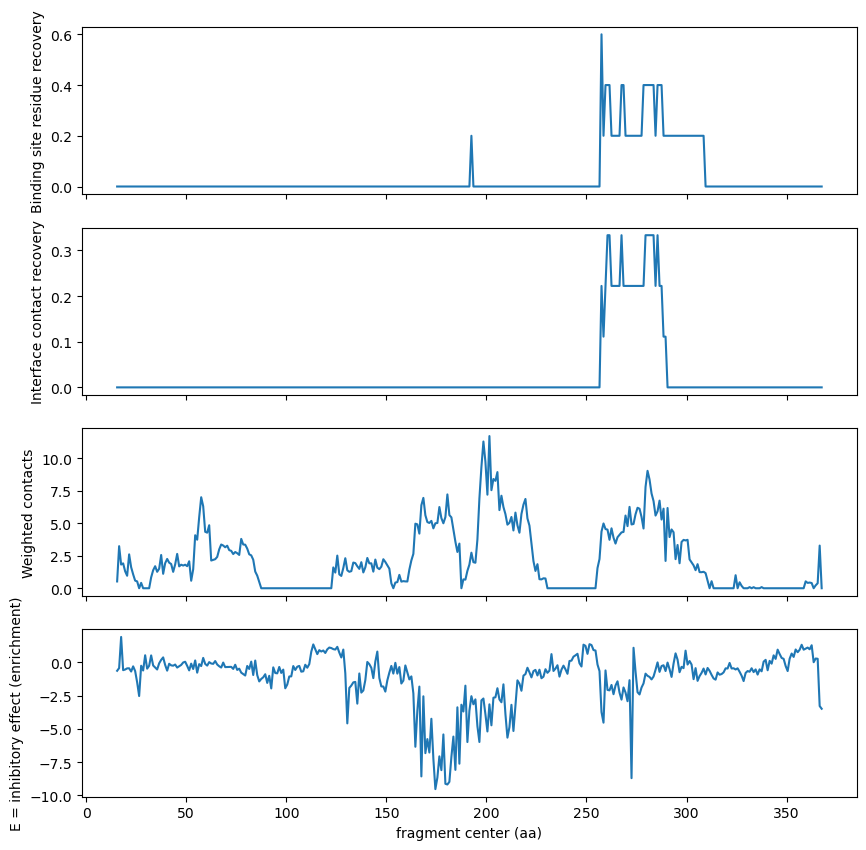

In [66]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ftsZ-fstZ_258-287.png',dpi=300)

# ftsZ - other

In [28]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6unx_ftsZ_ABC.pdb'
interface_contacts_list = []
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'C':resRange(),'A':resRange(353,382)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'C'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

0
[]


# rplL - rplL

In [67]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1rqu_rplL_AB.pdb'
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'B':resRange(),'A':resRange(5,34)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print(sorted([residueContactName(x,y) for x,y in contacts_residues]))

32
['A_10-B_2', 'A_10-B_7', 'A_11-B_26', 'A_11-B_30', 'A_12-B_30', 'A_14-B_2', 'A_14-B_4', 'A_14-B_7', 'A_18-B_4', 'A_21-B_4', 'A_22-B_4', 'A_22-B_7', 'A_22-B_8', 'A_25-B_8', 'A_26-B_11', 'A_26-B_23', 'A_26-B_8', 'A_29-B_8', 'A_30-B_11', 'A_30-B_12', 'A_30-B_8', 'A_6-B_2', 'A_7-B_10', 'A_7-B_14', 'A_7-B_22', 'A_7-B_26', 'A_7-B_7', 'A_8-B_22', 'A_8-B_25', 'A_8-B_26', 'A_8-B_29', 'A_8-B_30']


In [68]:
merge_df['gene'].unique()

array(['folA-coding-EcoliBL21DE3', 'ftsZ-coding-EcoliBL21DE3',
       'groL-coding-EcoliBL21DE3', 'gyrA-coding-EcoliBL21DE3',
       'lptG-coding-EcoliBL21DE3', 'rpIL-coding-EcoliBL21DE3',
       'ssb-coding-EcoliBL21DE3'], dtype=object)

In [70]:
inhib_df.condition.unique()

array(['30aa_monomer_rplL'], dtype=object)

In [15]:
path = structure_dir_path+'1rqu_rplL_AB.pdb'
gene_name = 'rpIL-coding-EcoliBL21DE3'
frag_aa_start = [5]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)]
rec_list = []
bindingres_rec_list = []
pred_contacts_map = dict()
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(frag_aa_start[0],frag_aa_start[0])})
    fixResidueNumbers(s_extract[0]['A'],1)
    fixResidueNumbers(s_extract[0]['B'],frag_aa_start[0])
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])


# sim_matrix = np.array(rec_list).reshape(1,len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

rpIL_1-121_rpIL_5-34 5
experimental fragment rpIL_1-121_rpIL_5-34 has 0 contacts


NameError: name 'parser' is not defined

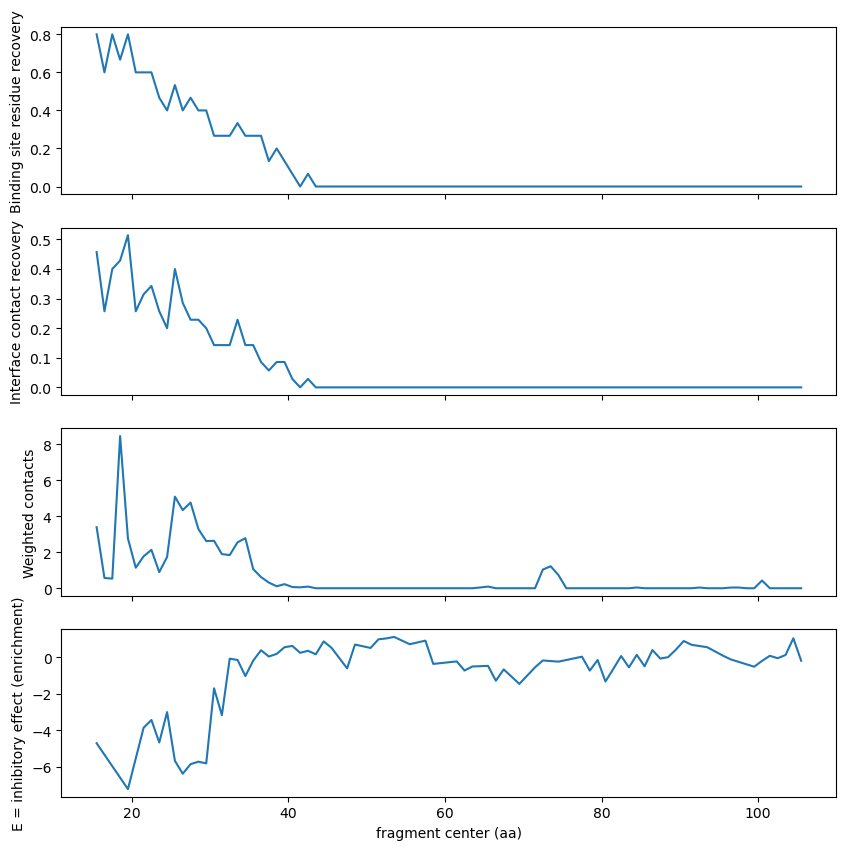

In [74]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_rplL_5-34.png',dpi=300)

In [14]:
print(sorted([residueContactName(x,y) for x,y in pred_contacts_map['rpIL_1-121_rpIL_4-33']]))

['A_11-B_27', 'A_11-B_31', 'A_12-B_31', 'A_19-B_27', 'A_19-B_31', 'A_2-B_11', 'A_20-B_33', 'A_22-B_5', 'A_23-B_24', 'A_25-B_5', 'A_26-B_12', 'A_26-B_23', 'A_26-B_24', 'A_26-B_8', 'A_27-B_24', 'A_27-B_28', 'A_30-B_12', 'A_30-B_13', 'A_32-B_17', 'A_32-B_21', 'A_34-B_28', 'A_37-B_21', 'A_4-B_15', 'A_4-B_19', 'A_4-B_22', 'A_7-B_23', 'A_7-B_8', 'A_8-B_30']


# rplL - rplJ

In [10]:
# Get the contact info for each fragment
s_path = structure_dir_path+'3j7z_rplL_6_rplJ_5.pdb'
parser = PDBParser(QUIET=True)
s_extract = parser.get_structure("s", s_path)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'5':resRange(),'6':resRange(5,34)})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'5'},{'6'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

7
['5_138-6_23', '5_138-6_31', '5_132-6_20', '5_138-6_26', '5_138-6_27', '5_132-6_24', '5_135-6_23']


In [13]:
path = structure_dir_path+'3j7z_rplL_6_rplJ_5.pdb'
gene_name = 'rpIL-coding-EcoliBL21DE3'
frag_aa_start = [5]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_rplJ')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_rplJ')]
rec_list = []
bindingres_rec_list = []
pred_contacts_map = dict()
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'5':resRange(),'6':resRange(frag_aa_start[0],frag_aa_start[0]+30)})
    s_extract[0]['5'].id = 'A'
    s_extract[0]['6'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print([residueContactName(x,y) for x,y in contacts_residues])
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])


# sim_matrix = np.array(rec_list).reshape(1,len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

rplJ1copies_1-804_rplL_5-34 5
['A_138-B_26', 'A_138-B_23', 'A_138-B_27', 'A_132-B_20', 'A_132-B_24', 'A_135-B_23', 'A_138-B_31']
experimental fragment rplJ1copies_1-804_rplL_5-34 has 7 contacts
['A_139-B_20', 'A_129-B_21', 'A_139-B_24']
pred fragment rplJ1copies_1-804_rplL_1-30 has 
3 interface contacts and (0, 7) recovery
3 binding site contacts and 0 recovery
['A_139-B_20', 'A_129-B_21', 'A_139-B_24', 'A_151-B_31', 'A_151-B_27']
pred fragment rplJ1copies_1-804_rplL_2-31 has 
5 interface contacts and (0, 7) recovery
3 binding site contacts and 0 recovery
['A_139-B_20', 'A_129-B_21', 'A_139-B_24', 'A_150-B_31']
pred fragment rplJ1copies_1-804_rplL_3-32 has 
4 interface contacts and (0, 7) recovery
3 binding site contacts and 0 recovery
['A_139-B_20', 'A_129-B_21', 'A_139-B_24', 'A_113-B_17', 'A_153-B_32', 'A_129-B_17', 'A_114-B_16', 'A_150-B_31', 'A_153-B_31', 'A_145-B_33', 'A_139-B_12']
pred fragment rplJ1copies_1-804_rplL_4-33 has 
11 interface contacts and (0, 7) recovery
3 binding 

[]
pred fragment rplJ1copies_1-804_rplL_44-73 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_45-74 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_46-75 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_47-76 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_48-77 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_49-78 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_50-79 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment rplJ1copies_1-804_rplL_51-80 has 
0 interface contacts and (0, 0) 

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


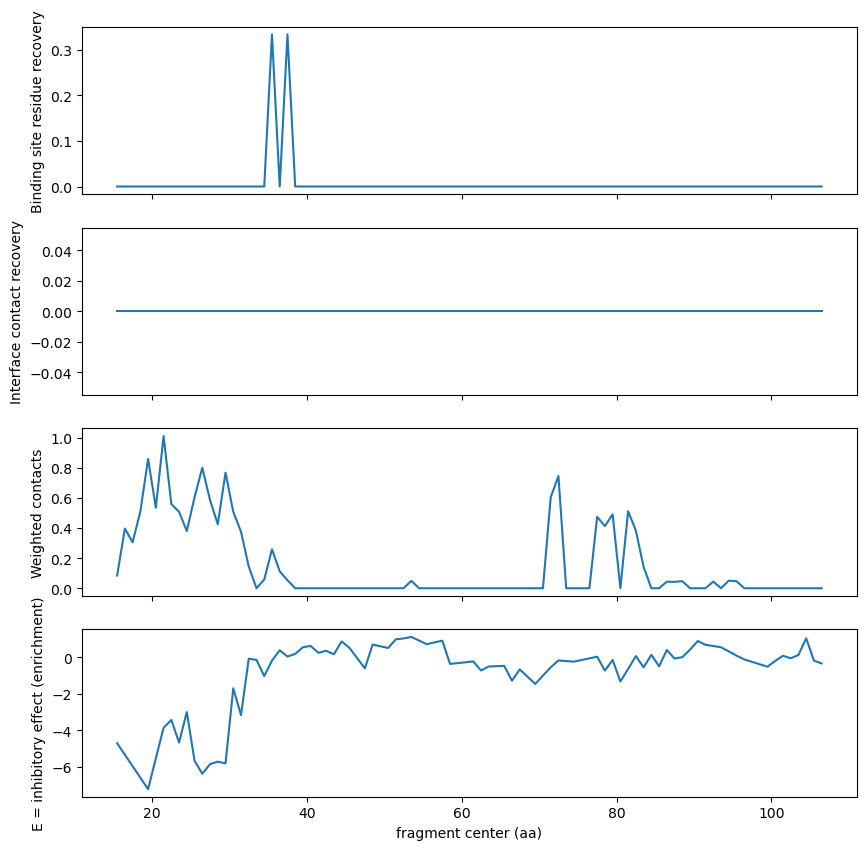

In [78]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230208_rplJ_5-34.png',dpi=300)

# ssb - ssb

In [28]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1eqq_ssb_ABCD.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'D':resRange(52,81),'A':resRange(),'B':resRange(),'C':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'D'},{'A','B','C'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

12
['C_7-D_56', 'C_84-D_56', 'B_106-D_81', 'A_112-D_77', 'B_81-D_81', 'A_77-D_77', 'C_85-D_54', 'C_86-D_54', 'B_6-D_79', 'B_8-D_79', 'C_84-D_54', 'B_8-D_81']


D-C: 5
D-B: 5
D_A: 2

## ssb - ssb monomer

In [30]:
merge_df.gene.unique()

array(['folA-coding-EcoliBL21DE3', 'ftsZ-coding-EcoliBL21DE3',
       'groL-coding-EcoliBL21DE3', 'gyrA-coding-EcoliBL21DE3',
       'lptG-coding-EcoliBL21DE3', 'rpIL-coding-EcoliBL21DE3',
       'ssb-coding-EcoliBL21DE3'], dtype=object)

In [31]:
merge_df.condition.unique()

array(['30aa_monomer_folA', '30aa_monomer_fstZ', '30aa_monomer_groL',
       '30aa_dimer_groL', '30aa_monomer_groS', '30aa_monomer_gyrA',
       '30aa_monomer_gyrB', '30aa_monomer_lptG', '30aa_monomer_lptF',
       '30aa_monomer_rplL', '30aa_monomer_ssb', '30aa_dimer_ssb',
       '30aa_tetramer_ssb'], dtype=object)

In [67]:
path = structure_dir_path+'1eqq_ssb_ABCD.pdb'
gene_name = 'ssb-coding-EcoliBL21DE3'
frag_aa_start = [52]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_ssb')].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_ssb')].copy(deep=True)
rec_list_a, rec_list_b, rec_list_c = [], [], []
bindingres_rec_list_a, bindingres_rec_list_b, bindingres_rec_list_c = [], [], []
# pred_contacts_map_ = dict()
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(),'C':resRange(),'D':resRange(frag_aa_start[0],frag_aa_start[0]+30)})
    contacts_residues_A = getInterfaceContactsFromStructure(s_extract,{'D'},{'A'},4.0)
    contacts_residues_B = getInterfaceContactsFromStructure(s_extract,{'D'},{'B'},4.0)
    contacts_residues_C = getInterfaceContactsFromStructure(s_extract,{'D'},{'C'},4.0)
    print(f"experimental fragment {row['fragment_name']} and chain A has {len(contacts_residues_A)} contacts")
    print(f"experimental fragment {row['fragment_name']} and chain A has {len(contacts_residues_B)} contacts")
    print(f"experimental fragment {row['fragment_name']} and chain A has {len(contacts_residues_C)} contacts")
    for j,row_pred in pred_df.iterrows():
        # CHAIN D - A
        print("chain D - A")
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        s_prediction[0]['A'].id = 'A'
        s_prediction[0]['B'].id = 'D'
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'D'},{'A'},4.0)
        rec = contactsRecovered(contacts_residues_A,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_A,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_a.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_a.append(bindingres_rec[0]/bindingres_rec[1])
        
        # CHAIN D - B
        print("chain D - B")
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        s_prediction[0]['A'].id = 'X'
        s_prediction[0]['B'].id = 'D'
        s_prediction[0]['X'].id = 'B'
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'D'},{'B'},4.0)
        rec = contactsRecovered(contacts_residues_B,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_B,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_b.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_b.append(bindingres_rec[0]/bindingres_rec[1])
        
        # CHAIN D - C
        print("chain D - C")
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        s_prediction[0]['A'].id = 'C'
        s_prediction[0]['B'].id = 'D'
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'D'},{'C'},4.0)
        rec = contactsRecovered(contacts_residues_C,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_C,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_c.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_c.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery_a'] = bindingres_rec_list_a
pred_df['interface_contact_recovery_a'] = rec_list_a
pred_df['binding_site_residue_recovery_b'] = bindingres_rec_list_b
pred_df['interface_contact_recovery_b'] = rec_list_b
pred_df['binding_site_residue_recovery_c'] = bindingres_rec_list_c
pred_df['interface_contact_recovery_c'] = rec_list_c

ssb_1-178_ssb_52-81 52
experimental fragment ssb_1-178_ssb_52-81 and chain A has 2 contacts
experimental fragment ssb_1-178_ssb_52-81 and chain A has 5 contacts
experimental fragment ssb_1-178_ssb_52-81 and chain A has 5 contacts
chain D - A
pred fragment ssb_1-178_ssb_1-30 has 
22 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_1-30 has 
22 interface contacts and (0, 5) recovery
4 binding site contacts and 2 recovery
chain D - C
pred fragment ssb_1-178_ssb_1-30 has 
22 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - A
pred fragment ssb_1-178_ssb_2-31 has 
22 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_2-31 has 
22 interface contacts and (0, 5) recovery
4 binding site contacts and 2 recovery
chain D - C
pred fragment ssb_1-178_ssb_2-31 has 
22 interface contacts and (0, 5) recovery
4 binding site contacts

pred fragment ssb_1-178_ssb_23-52 has 
4 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_23-52 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - C
pred fragment ssb_1-178_ssb_23-52 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 2 recovery
chain D - A
pred fragment ssb_1-178_ssb_24-53 has 
4 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_24-53 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - C
pred fragment ssb_1-178_ssb_24-53 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 2 recovery
chain D - A
pred fragment ssb_1-178_ssb_25-54 has 
7 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_25-54 has 
7 interface contacts and (0, 5) recovery
4 b

pred fragment ssb_1-178_ssb_45-74 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_45-74 has 
4 interface contacts and (3, 5) recovery
4 binding site contacts and 2 recovery
chain D - A
pred fragment ssb_1-178_ssb_46-75 has 
4 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_46-75 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_46-75 has 
4 interface contacts and (4, 5) recovery
4 binding site contacts and 3 recovery
chain D - A
pred fragment ssb_1-178_ssb_47-76 has 
5 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_47-76 has 
5 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_47-76 has 
5 interface contacts and (4, 5) recovery
4 b

pred fragment ssb_1-178_ssb_67-96 has 
3 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - A
pred fragment ssb_1-178_ssb_68-97 has 
3 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_68-97 has 
3 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_68-97 has 
3 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - A
pred fragment ssb_1-178_ssb_69-98 has 
4 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_69-98 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_69-98 has 
4 interface contacts and (0, 5) recovery
4 binding site contacts and 1 recovery
chain D - A
pred fragment ssb_1-178_ssb_70-99 has 
5 interface contacts and (0, 2) recovery
2 b

pred fragment ssb_1-178_ssb_89-118 has 
2 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_89-118 has 
2 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_89-118 has 
2 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - A
pred fragment ssb_1-178_ssb_90-119 has 
2 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_90-119 has 
2 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_90-119 has 
2 interface contacts and (0, 5) recovery
4 binding site contacts and 0 recovery
chain D - A
pred fragment ssb_1-178_ssb_91-120 has 
1 interface contacts and (0, 2) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_91-120 has 
1 interface contacts and (0, 5) reco

pred fragment ssb_1-178_ssb_110-139 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_110-139 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
chain D - A
pred fragment ssb_1-178_ssb_111-140 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_111-140 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_111-140 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
chain D - A
pred fragment ssb_1-178_ssb_112-141 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
chain D - B
pred fragment ssb_1-178_ssb_112-141 has 
0 interface contacts and (0, 0) recovery
4 binding site contacts and 0 recovery
chain D - C
pred fragment ssb_1-178_ssb_112-141 has 
0 interface contacts and (0,

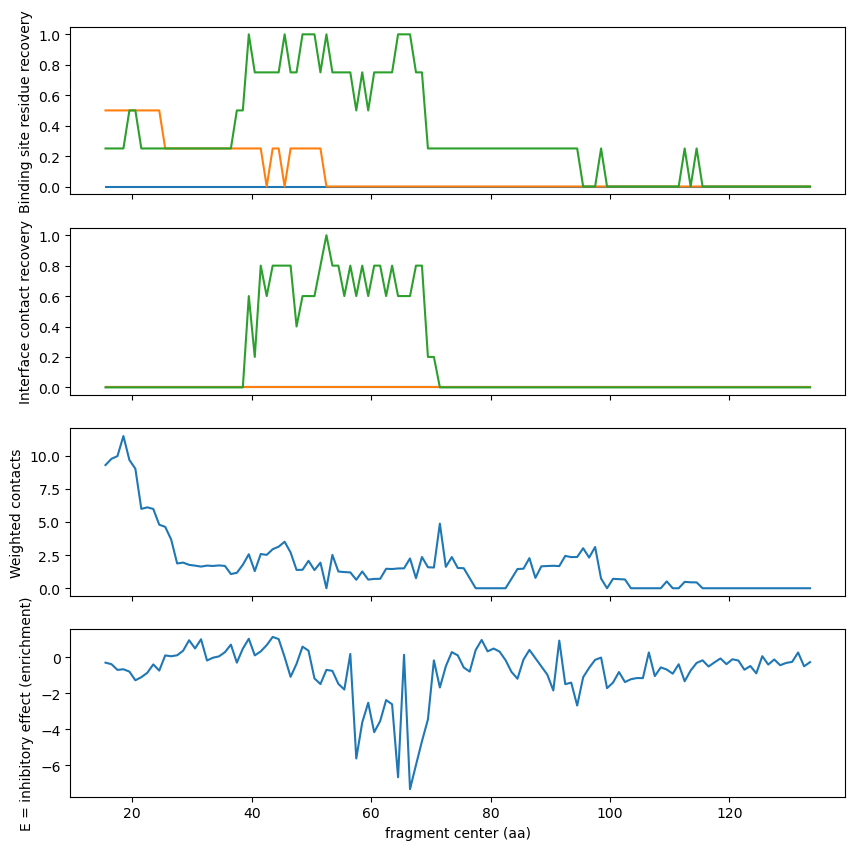

In [68]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_a',ax=ax1)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_b',ax=ax1)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_c',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_a',ax=ax2)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_b',ax=ax2)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_c',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ssb_52-81.png',dpi=300)

## ssb dimer

Note: I wasn't sure how to handle the fragment + ssb dimer case, due to ambiguous chain mapping. I considered looking at all possible chain mappings, but that seemed excessive. Instead, I manually inspected a predicted structure and noticed that the two full-length ssb chains A and B aligned to the chains A and B in 1eqq. I decided to assume this chain mapping (but verify it by RMSD).

#### test

In [55]:
path = structure_dir_path+'1eqq_ssb_ABCD.pdb'
s_native_extract =  extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(),'D':resRange(52,81)})
s_native_extract[0]['D'].id = 'C'

s_prediction = parser.get_structure("s", pred_df.loc[4374]['path'])
fixResidueNumbers(s_prediction[0]['C'],pred_df.loc[4374]['fragment start (aa)'])

alignStructureByChains(s_native_extract,['A','B'],{'A':resRange(2,110),'B':resRange(2,110)},s_prediction)

Aligned chains with RMSD: 2.408578882809016


2.408578882809016

In [56]:
path = structure_dir_path+'1eqq_ssb_ABCD.pdb'
s_native_extract =  extractFragmentFromNativeStructure(path,{'A':resRange(),'C':resRange()})
s_native_extract[0]['C'].id = 'B'

s_prediction = parser.get_structure("s", pred_df.loc[4374]['path'])
fixResidueNumbers(s_prediction[0]['C'],pred_df.loc[4374]['fragment start (aa)'])

alignStructureByChains(s_native_extract,['A','B'],{'A':resRange(2,110),'B':resRange(2,110)},s_prediction)

Aligned chains with RMSD: 21.242712354569047


21.242712354569047

In [64]:
path = structure_dir_path+'1eqq_ssb_ABCD.pdb'
gene_name = 'ssb-coding-EcoliBL21DE3'
frag_aa_start = [52]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_dimer_ssb')].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_dimer_ssb')].copy(deep=True)
rec_list = []
bindingres_rec_list = []
# pred_contacts_map_ = dict()
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'A':resRange(),'B':resRange(),'D':resRange(frag_aa_start[0],frag_aa_start[0]+30)})
    s_extract[0]['D'].id = 'C'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A','B'},{'C'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues])
#     print(f"experimental fragment {row['fragment_name']} and chain A has {len(contacts_residues_C)} contacts")
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
        fixResidueNumbers(s_prediction[0]['C'],row_pred['fragment start (aa)'])
        
        # check that chain assignment is correct
        rmsd = alignStructureByChains(s_extract,['A','B'],{'A':resRange(2,110),'B':resRange(2,110)},s_prediction)
        if rmsd > 5:
            raise ValueError("Chain assignment is incorrect")
       
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A','B'},{'C'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])
        

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

ssb2copies_1-178_ssb_52-81 52
experimental fragment ssb2copies_1-178_ssb_52-81 has 7 contacts
['A_112-C_77', 'B_8-C_79', 'B_106-C_81', 'B_8-C_81', 'B_6-C_79', 'A_77-C_77', 'B_81-C_81']
Aligned chains with RMSD: 2.4215110255931256
['A_10-C_10', 'B_111-C_4', 'B_79-C_8', 'A_12-C_12', 'B_79-C_6', 'B_81-C_8', 'A_79-C_12', 'B_111-C_6', 'B_10-C_8', 'B_8-C_8', 'B_8-C_10']
pred fragment ssb2copies_1-178_ssb_1-30 has 
11 interface contacts and (0, 7) recovery
6 binding site contacts and 2 recovery
Aligned chains with RMSD: 2.4169706260052495
['B_12-C_12', 'A_8-C_10', 'A_111-C_3', 'A_8-C_8', 'A_10-C_8', 'A_79-C_6', 'A_81-C_8', 'B_10-C_10', 'A_79-C_8', 'B_79-C_12']
pred fragment ssb2copies_1-178_ssb_2-31 has 
10 interface contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4659294661028284
['B_12-C_12', 'A_8-C_10', 'A_111-C_4', 'A_8-C_8', 'A_10-C_8', 'A_79-C_6', 'A_81-C_8', 'B_10-C_10', 'A_79-C_8', 'B_79-C_12']
pred fragment ssb2copies_1-178_ssb_3-32 has

[]
pred fragment ssb2copies_1-178_ssb_42-71 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4644179695783697
[]
pred fragment ssb2copies_1-178_ssb_43-72 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4560922545444672
[]
pred fragment ssb2copies_1-178_ssb_44-73 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.475105626250613
['A_1-C_63']
pred fragment ssb2copies_1-178_ssb_45-74 has 
1 interface contacts and (0, 7) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4571466961916775
[]
pred fragment ssb2copies_1-178_ssb_46-75 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.459047644569564
[]
pred fragment ssb2copies_1-178_ssb_47-76 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 re

Aligned chains with RMSD: 2.4380016858290534
['B_8-C_79', 'B_8-C_81', 'B_6-C_79', 'A_12-C_79']
pred fragment ssb2copies_1-178_ssb_79-108 has 
4 interface contacts and (3, 7) recovery
6 binding site contacts and 2 recovery
Aligned chains with RMSD: 2.47257376325484
['B_6-C_109', 'B_8-C_81']
pred fragment ssb2copies_1-178_ssb_80-109 has 
2 interface contacts and (1, 7) recovery
6 binding site contacts and 2 recovery
Aligned chains with RMSD: 2.507990834261494
['B_8-C_81', 'B_3-C_109']
pred fragment ssb2copies_1-178_ssb_81-110 has 
2 interface contacts and (1, 7) recovery
6 binding site contacts and 1 recovery
Aligned chains with RMSD: 2.46585365128671
['B_6-C_111']
pred fragment ssb2copies_1-178_ssb_82-111 has 
1 interface contacts and (0, 7) recovery
6 binding site contacts and 1 recovery
Aligned chains with RMSD: 2.4537700539959353
['B_6-C_111', 'B_4-C_111', 'A_12-C_111', 'B_5-C_111']
pred fragment ssb2copies_1-178_ssb_83-112 has 
4 interface contacts and (0, 7) recovery
6 binding site

[]
pred fragment ssb2copies_1-178_ssb_121-150 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4552276218538625
[]
pred fragment ssb2copies_1-178_ssb_122-151 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.471327979297263
[]
pred fragment ssb2copies_1-178_ssb_123-152 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4558741496381478
[]
pred fragment ssb2copies_1-178_ssb_124-153 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4811138500056353
[]
pred fragment ssb2copies_1-178_ssb_125-154 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
Aligned chains with RMSD: 2.4801178170238956
[]
pred fragment ssb2copies_1-178_ssb_126-155 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0

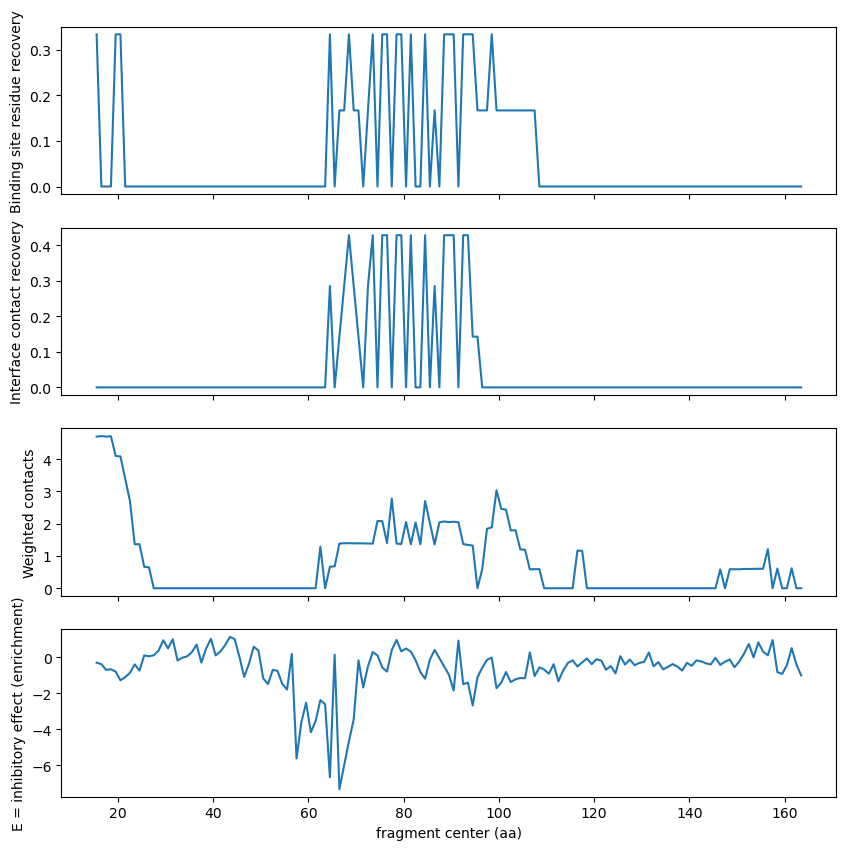

In [66]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_ssbdimer_52-81.png',dpi=300)

# groL - groL

## groL 3-32

In [9]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(3,32),'B':resRange(),'G':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'G'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

8
['A_3-B_63', 'A_8-B_25', 'A_4-B_59', 'A_6-B_22', 'A_4-B_61', 'A_3-B_62', 'A_3-B_61', 'A_8-B_26']
4
['A_26-G_8', 'A_29-G_518', 'A_25-G_8', 'A_22-G_6']


In [38]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [3]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groL')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groL')]
rec_list_b, rec_list_g = [], []
bindingres_rec_list_b, bindingres_rec_list_g = [], []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract_ba = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'B':resRange()})
    s_extract_ba[0]['A'].id = 'X'
    s_extract_ba[0]['B'].id = 'A'
    s_extract_ba[0]['X'].id = 'B'
    contacts_residues_ba = getInterfaceContactsFromStructure(s_extract_ba,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains B-A in native) has {len(contacts_residues)} contacts")
    
    s_extract_ag = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'G':resRange()})
    s_extract_ag[0]['A'].id = 'B'
    s_extract_ag[0]['G'].id = 'A'
    contacts_residues_ga = getInterfaceContactsFromStructure(s_extract_ag,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains G-A in native) has {len(contacts_residues)} contacts")
    
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        
        # Check B-A contacts
        rec = contactsRecovered(contacts_residues_ba,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_ba,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_b.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_b.append(bindingres_rec[0]/bindingres_rec[1])
        
        # Check G-A contacts
        rec = contactsRecovered(contacts_residues_ga,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_ga,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_g.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_g.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery_ba'] = bindingres_rec_list_b
pred_df['interface_contact_recovery_ba'] = rec_list_b
pred_df['binding_site_residue_recovery_ga'] = bindingres_rec_list_g
pred_df['interface_contact_recovery_ga'] = rec_list_g

groEL_1-548_groEL_3-32 3
experimental fragment groEL_1-548_groEL_3-32 (originally chains B-A in native) has 3 contacts
experimental fragment groEL_1-548_groEL_3-32 (originally chains G-A in native) has 3 contacts
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (7, 8) recovery
7 binding site contacts and 6 recovery
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (7, 8) recovery
7 binding site contacts and 6 recovery
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_3-32 has 
8 interface contacts and (7, 8) recovery
7 binding site contacts and 6 recovery
pred fragment groEL_1-548_groEL_3-32 has 
8 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_4-33 has 
4 interface c

pred fragment groEL_1-548_groEL_35-64 has 
35 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_35-64 has 
35 interface contacts and (0, 4) recovery
3 binding site contacts and 1 recovery
pred fragment groEL_1-548_groEL_36-65 has 
1 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_36-65 has 
1 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_37-66 has 
30 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_37-66 has 
30 interface contacts and (0, 4) recovery
3 binding site contacts and 1 recovery
pred fragment groEL_1-548_groEL_38-67 has 
26 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_38-67 has 
26 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragm

pred fragment groEL_1-548_groEL_69-98 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_69-98 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_70-99 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_70-99 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_71-100 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_71-100 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_72-101 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_72-101 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragmen

pred fragment groEL_1-548_groEL_103-132 has 
6 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_103-132 has 
6 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_104-133 has 
8 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_104-133 has 
8 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_105-134 has 
7 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_105-134 has 
7 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_106-135 has 
7 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_106-135 has 
7 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_137-166 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_137-166 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_138-167 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_138-167 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_139-168 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_139-168 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_140-169 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_140-169 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_171-200 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_171-200 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_172-201 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_172-201 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_173-202 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_173-202 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_174-203 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_174-203 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_205-234 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_205-234 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_206-235 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_206-235 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_207-236 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_207-236 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_208-237 has 
1 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_208-237 has 
1 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_239-268 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_239-268 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_240-269 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_240-269 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_241-270 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_241-270 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_242-271 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_242-271 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_273-302 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_273-302 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_274-303 has 
3 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_274-303 has 
3 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_275-304 has 
4 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_275-304 has 
4 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_276-305 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_276-305 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_307-336 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_307-336 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_308-337 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_308-337 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_309-338 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_309-338 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_310-339 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_310-339 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_341-370 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_341-370 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_342-371 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_342-371 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_343-372 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_343-372 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_344-373 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_344-373 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_375-404 has 
10 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_375-404 has 
10 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_376-405 has 
8 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_376-405 has 
8 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_377-406 has 
11 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_377-406 has 
11 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_378-407 has 
10 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_378-407 has 
10 interface contacts and (0, 4) recovery
3 binding site contacts and 0 rec

pred fragment groEL_1-548_groEL_409-438 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_409-438 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_410-439 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_410-439 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_411-440 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_411-440 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_412-441 has 
2 interface contacts and (0, 8) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_412-441 has 
2 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_442-471 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_442-471 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_443-472 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_443-472 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_444-473 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_444-473 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_445-474 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_445-474 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_476-505 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_476-505 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_477-506 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_477-506 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_478-507 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_478-507 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_479-508 has 
0 interface contacts and (0, 0) recovery
7 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_479-508 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery


pred fragment groEL_1-548_groEL_510-539 has 
20 interface contacts and (0, 8) recovery
7 binding site contacts and 2 recovery
pred fragment groEL_1-548_groEL_510-539 has 
20 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_511-540 has 
20 interface contacts and (0, 8) recovery
7 binding site contacts and 2 recovery
pred fragment groEL_1-548_groEL_511-540 has 
20 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_512-541 has 
20 interface contacts and (0, 8) recovery
7 binding site contacts and 3 recovery
pred fragment groEL_1-548_groEL_512-541 has 
20 interface contacts and (0, 4) recovery
3 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_513-542 has 
20 interface contacts and (0, 8) recovery
7 binding site contacts and 3 recovery
pred fragment groEL_1-548_groEL_513-542 has 
20 interface contacts and (0, 4) recovery
3 binding site contacts and 0 r

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

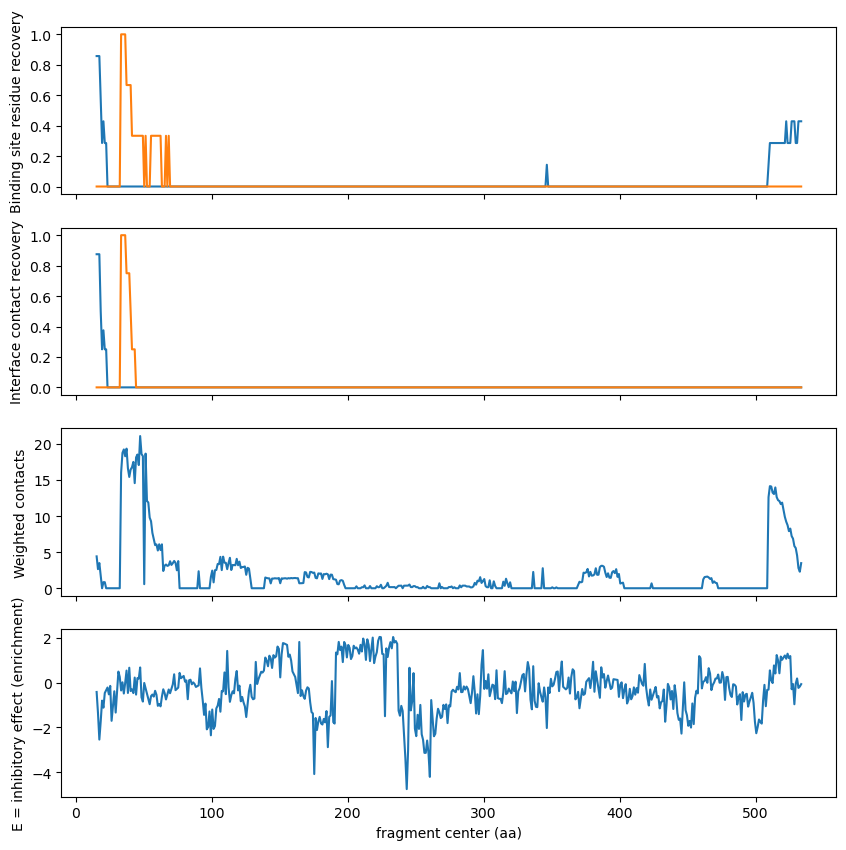

In [39]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_ba',ax=ax1)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_ga',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_ba',ax=ax2)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_ga',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_3-32.png',dpi=300)

## groL 87-116

In [40]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_POUBAGHNM.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(87,116),'B':resRange(),'H':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'H'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

2
['A_111-B_36', 'A_113-B_36']
3
['A_111-H_434', 'A_108-H_109', 'A_105-H_109']


In [53]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [87]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groL')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groL')]
rec_list_b, rec_list_h = [], []
bindingres_rec_list_b, bindingres_rec_list_h = [], []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract_ba = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'B':resRange()})
    s_extract_ba[0]['A'].id = 'X'
    s_extract_ba[0]['B'].id = 'A'
    s_extract_ba[0]['X'].id = 'B'
    contacts_residues_b = getInterfaceContactsFromStructure(s_extract_ba,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains B-A in native) has {len(contacts_residues_b)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues_b])
    
    s_extract_ag = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'H':resRange()})
    s_extract_ag[0]['A'].id = 'B'
    s_extract_ag[0]['H'].id = 'A'
    contacts_residues_h = getInterfaceContactsFromStructure(s_extract_ag,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains H-A in native) has {len(contacts_residues_h)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues_h])
    
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in contacts_residues_b])
        
        # Check B-A contacts
        rec = contactsRecovered(contacts_residues_b,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_b,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_b.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_b.append(bindingres_rec[0]/bindingres_rec[1])
        
        # Check G-A contacts
        rec = contactsRecovered(contacts_residues_h,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_h,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_h.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_h.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery_b'] = bindingres_rec_list_b
pred_df['interface_contact_recovery_b'] = rec_list_b
pred_df['binding_site_residue_recovery_h'] = bindingres_rec_list_h
pred_df['interface_contact_recovery_h'] = rec_list_h

groEL_1-548_groEL_87-116 87
experimental fragment groEL_1-548_groEL_87-116 (originally chains B-A in native) has 2 contacts
['A_36-B_111', 'A_36-B_113']
experimental fragment groEL_1-548_groEL_87-116 (originally chains H-A in native) has 3 contacts
['A_434-B_111', 'A_109-B_105', 'A_109-B_108']
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_3-32 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fra

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_30-59 has 
33 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_30-59 has 
33 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_31-60 has 
34 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_31-60 has 
34 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_32-61 has 
32 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_32-61 has 
32 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_33-62 has 
35 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment gr

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_60-89 has 
10 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_60-89 has 
10 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_61-90 has 
13 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_61-90 has 
13 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_62-91 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_62-91 has 
2 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_63-92 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_90-119 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_90-119 has 
8 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_91-120 has 
6 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_91-120 has 
6 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_92-121 has 
6 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_92-121 has 
6 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_93-122 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment gr

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_120-149 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_120-149 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_121-150 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_121-150 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_122-151 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_122-151 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_123-152 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_150-179 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_150-179 has 
2 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_151-180 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_151-180 has 
2 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_152-181 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_152-181 has 
2 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_153-182 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_180-209 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_180-209 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_181-210 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_181-210 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_182-211 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_182-211 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_183-212 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_210-239 has 
4 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_210-239 has 
4 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_211-240 has 
1 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_211-240 has 
1 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_212-241 has 
1 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_212-241 has 
1 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_213-242 has 
1 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_241-270 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_241-270 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_242-271 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_242-271 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_243-272 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_243-272 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_244-273 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_271-300 has 
4 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_271-300 has 
4 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_272-301 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_272-301 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_273-302 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_273-302 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_274-303 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_302-331 has 
11 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_302-331 has 
11 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_303-332 has 
5 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_303-332 has 
5 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_304-333 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_304-333 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_305-334 has 
9 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fr

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_332-361 has 
1 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_332-361 has 
1 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_333-362 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_333-362 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_334-363 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_334-363 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_335-364 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_362-391 has 
11 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_362-391 has 
11 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_363-392 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_363-392 has 
8 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_364-393 has 
10 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_364-393 has 
10 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_365-394 has 
8 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred 

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_392-421 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_392-421 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_393-422 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_393-422 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_394-423 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_394-423 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_395-424 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_422-451 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_422-451 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_423-452 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_423-452 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_424-453 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_424-453 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_425-454 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_453-482 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_453-482 has 
3 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_454-483 has 
2 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_454-483 has 
2 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_455-484 has 
4 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_455-484 has 
4 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_456-485 has 
3 interface contacts and (0, 2) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_483-512 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_483-512 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_484-513 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_484-513 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_485-514 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred fragment groEL_1-548_groEL_485-514 has 
0 interface contacts and (0, 0) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_486-515 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
pred frag

['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_513-542 has 
20 interface contacts and (0, 2) recovery
1 binding site contacts and 1 recovery
pred fragment groEL_1-548_groEL_513-542 has 
20 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_514-543 has 
19 interface contacts and (0, 2) recovery
1 binding site contacts and 1 recovery
pred fragment groEL_1-548_groEL_514-543 has 
19 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_515-544 has 
18 interface contacts and (0, 2) recovery
1 binding site contacts and 1 recovery
pred fragment groEL_1-548_groEL_515-544 has 
18 interface contacts and (0, 3) recovery
2 binding site contacts and 0 recovery
['A_36-B_111', 'A_36-B_113']
pred fragment groEL_1-548_groEL_516-545 has 
17 interface contacts and (0, 2) recovery
1 binding site contacts and 1 recovery
pr

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

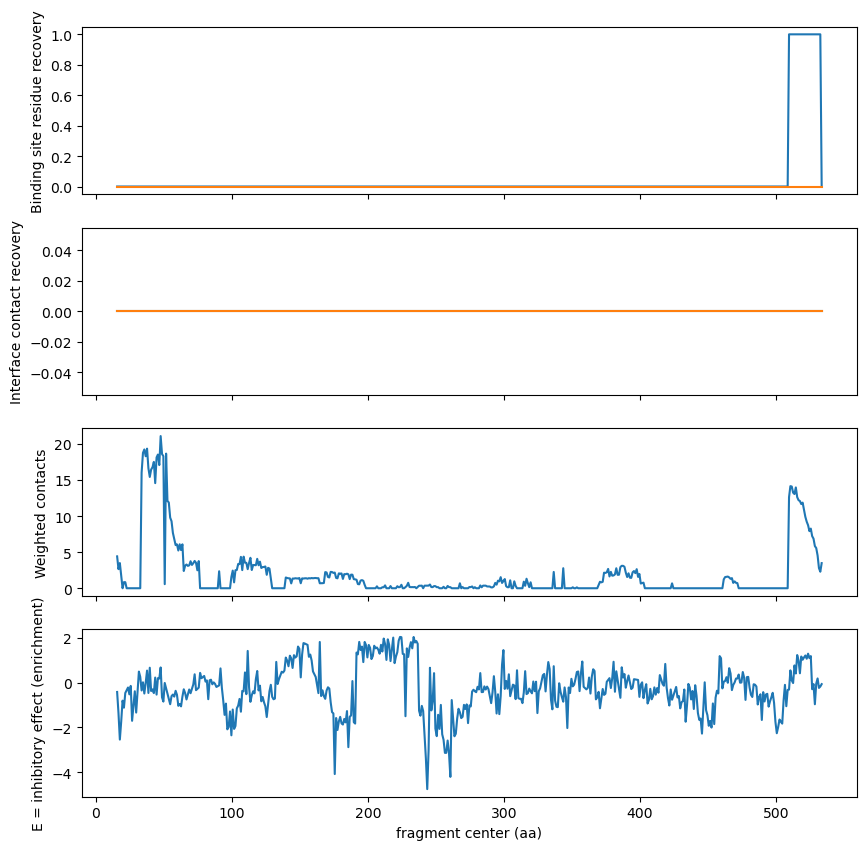

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_b',ax=ax1)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery_h',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_b',ax=ax2)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery_h',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_87-116.png',dpi=300)

## groL 431-460

In [45]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_POUBAGHNM.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(431,460),'B':resRange(),'H':resRange(),
                                                'P':resRange(),'O':resRange(),'U':resRange(),
                                                'H':resRange(),'N':resRange(),'M':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B','H','P','O','U','H','N','M'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

1
['A_438-H_434']


In [49]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [431]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groL')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groL')]
rec_list_h = []
bindingres_rec_list_h = []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract_ha = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'H':resRange()})
    s_extract_ha[0]['A'].id = 'B'
    s_extract_ha[0]['H'].id = 'A'
    contacts_residues_h = getInterfaceContactsFromStructure(s_extract_ha,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains H-A in native) has {len(contacts_residues_h)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues_h])
        
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        
        # Check G-A contacts
        rec = contactsRecovered(contacts_residues_h,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues_h,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list_h.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list_h.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list_h
pred_df['interface_contact_recovery'] = rec_list_h

groEL_1-548_groEL_431-460 431
experimental fragment groEL_1-548_groEL_431-460 (originally chains H-A in native) has 1 contacts
['A_434-B_438']
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_62-B_3', 'A_61-B_1', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3', 'A_41-B_4']
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_61-B_2', 'A_62-B_3', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3']
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_62-B_3', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3', 'A_41-B_4']
pred fragment groEL_1-548_groEL_3-32 has 
8 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_61-B_4', 'A_25-B_8']
pred fragment groEL_1-548_groEL_4-33 has 
4 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_26-B_8', 'A_2

['A_521-B_41', 'A_517-B_37', 'A_115-B_34', 'A_69-B_41', 'A_519-B_39', 'A_13-B_36', 'A_112-B_34', 'A_521-B_40', 'A_118-B_33', 'A_513-B_49', 'A_69-B_39', 'A_518-B_29', 'A_519-B_37', 'A_69-B_47', 'A_518-B_37', 'A_65-B_41', 'A_520-B_39', 'A_513-B_37', 'A_516-B_37', 'A_517-B_39', 'A_69-B_40', 'A_516-B_36', 'A_518-B_36', 'A_522-B_41', 'A_113-B_36', 'A_521-B_39', 'A_72-B_47', 'A_114-B_35', 'A_114-B_34', 'A_76-B_46', 'A_519-B_38', 'A_73-B_47', 'A_73-B_49']
pred fragment groEL_1-548_groEL_29-58 has 
33 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_521-B_41', 'A_517-B_37', 'A_115-B_34', 'A_69-B_41', 'A_519-B_39', 'A_112-B_34', 'A_521-B_40', 'A_118-B_33', 'A_513-B_49', 'A_69-B_39', 'A_519-B_37', 'A_69-B_47', 'A_518-B_37', 'A_65-B_41', 'A_4-B_59', 'A_520-B_39', 'A_513-B_37', 'A_516-B_37', 'A_517-B_39', 'A_114-B_51', 'A_69-B_40', 'A_516-B_36', 'A_518-B_36', 'A_522-B_41', 'A_113-B_36', 'A_521-B_39', 'A_72-B_47', 'A_114-B_35', 'A_114-B_34', 'A_76-B_46', 'A_519-B_38

['A_3-B_63', 'A_513-B_49', 'A_4-B_59', 'A_521-B_59', 'A_1-B_61', 'A_114-B_51', 'A_4-B_61', 'A_3-B_61', 'A_73-B_49']
pred fragment groEL_1-548_groEL_49-78 has 
9 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_47-B_69', 'A_41-B_69', 'A_49-B_73', 'A_39-B_69', 'A_387-B_76', 'A_47-B_73', 'A_40-B_69', 'A_46-B_76', 'A_47-B_72', 'A_41-B_65']
pred fragment groEL_1-548_groEL_50-79 has 
10 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_47-B_69', 'A_41-B_69', 'A_49-B_73', 'A_386-B_80', 'A_39-B_69', 'A_387-B_76', 'A_47-B_73', 'A_40-B_69', 'A_46-B_76', 'A_47-B_72', 'A_41-B_65']
pred fragment groEL_1-548_groEL_51-80 has 
11 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_3-B_63', 'A_4-B_59', 'A_521-B_59', 'A_1-B_61', 'A_4-B_61', 'A_6-B_60', 'A_3-B_61']
pred fragment groEL_1-548_groEL_52-81 has 
7 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_47-B_69', 'A_41-B_69'

['A_51-B_114', 'A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_458-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_94-123 has 
7 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_34-B_112']
pred fragment groEL_1-548_groEL_95-124 has 
5 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_458-B_112', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_96-125 has 
7 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_97-126 has 
6 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_51-B_114', 'A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_98-127 has 
7 

['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_142-171 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_143-172 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_144-173 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_145-174 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_146-175 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_147-176 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_1

['A_267-B_223', 'A_202-B_197']
pred fragment groEL_1-548_groEL_194-223 has 
2 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_203-B_224']
pred fragment groEL_1-548_groEL_195-224 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_264-B_224']
pred fragment groEL_1-548_groEL_196-225 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_264-B_224']
pred fragment groEL_1-548_groEL_197-226 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_264-B_224', 'A_260-B_224', 'A_1-B_214']
pred fragment groEL_1-548_groEL_198-227 has 
3 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_257-B_226']
pred fragment groEL_1-548_groEL_199-228 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_1-B_210']
pred fragment groEL_1-548_groEL_200-229 has 
1 interface contacts and (0, 1) recovery
1 binding s

[]
pred fragment groEL_1-548_groEL_250-279 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_251-280 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_252-281 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
['A_526-B_282', 'A_526-B_280', 'A_526-B_281', 'A_524-B_281', 'A_2-B_281']
pred fragment groEL_1-548_groEL_253-282 has 
5 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_254-283 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
['A_202-B_283']
pred fragment groEL_1-548_groEL_255-284 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_202-B_283']
pred fragment groEL_1-548_groEL_256-285 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
[]
pred

['A_264-B_305', 'A_268-B_307', 'A_68-B_321']
pred fragment groEL_1-548_groEL_301-330 has 
3 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_4-B_322', 'A_264-B_305', 'A_65-B_321', 'A_268-B_305', 'A_264-B_304', 'A_521-B_322', 'A_260-B_304', 'A_523-B_321', 'A_524-B_321', 'A_522-B_321', 'A_523-B_322']
pred fragment groEL_1-548_groEL_302-331 has 
11 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_1-B_321', 'A_268-B_305', 'A_264-B_304', 'A_260-B_304', 'A_268-B_304']
pred fragment groEL_1-548_groEL_303-332 has 
5 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_283-B_327', 'A_281-B_328', 'A_284-B_328']
pred fragment groEL_1-548_groEL_304-333 has 
3 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_1-B_322', 'A_4-B_322', 'A_264-B_305', 'A_268-B_307', 'A_526-B_321', 'A_268-B_305', 'A_2-B_322', 'A_260-B_305', 'A_523-B_333']
pred fragment groEL_1-548_groEL_305-334 h

['A_506-B_385', 'A_509-B_384', 'A_73-B_387', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_513-B_388', 'A_510-B_385', 'A_513-B_387', 'A_509-B_388']
pred fragment groEL_1-548_groEL_359-388 has 
10 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_506-B_385', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_513-B_388', 'A_510-B_385', 'A_513-B_387', 'A_509-B_388']
pred fragment groEL_1-548_groEL_360-389 has 
8 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_506-B_385', 'A_509-B_384', 'A_76-B_387', 'A_76-B_386', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_513-B_388', 'A_510-B_385', 'A_513-B_387', 'A_509-B_388']
pred fragment groEL_1-548_groEL_361-390 has 
11 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_506-B_385', 'A_76-B_387', 'A_76-B_386', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_513-B_388', 'A_510-B_385', 'A_513-B_387', 'A_509-B_388', 'A_513-B_391']
pred fragment groEL_1-548_gr

[]
pred fragment groEL_1-548_groEL_395-424 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_396-425 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_397-426 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_398-427 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_399-428 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_400-429 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_401-430 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_402-431 has 
0 interface contacts and (0, 0) recovery
1 binding site 

['A_112-B_457']
pred fragment groEL_1-548_groEL_457-486 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_112-B_458']
pred fragment groEL_1-548_groEL_458-487 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_459-488 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
['A_115-B_483']
pred fragment groEL_1-548_groEL_460-489 has 
1 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_461-490 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_462-491 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_463-492 has 
0 interface contacts and (0, 0) recovery
1 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_464-493 has 
0 interface conta

['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_38-B_519', 'A_43-B_523', 'A_37-B_519', 'A_36-B_516', 'A_37-B_518', 'A_29-B_518', 'A_388-B_509', 'A_37-B_513', 'A_39-B_520', 'A_41-B_521', 'A_37-B_517', 'A_39-B_521', 'A_385-B_506', 'A_40-B_521', 'A_385-B_509', 'A_384-B_506', 'A_37-B_516', 'A_36-B_518', 'A_63-B_524', 'A_39-B_517', 'A_39-B_519']
pred fragment groEL_1-548_groEL_504-533 has 
24 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_38-B_519', 'A_43-B_523', 'A_37-B_519', 'A_36-B_516', 'A_37-B_518', 'A_388-B_509', 'A_37-B_513', 'A_39-B_520', 'A_41-B_521', 'A_37-B_517', 'A_39-B_521', 'A_385-B_506', 'A_40-B_521', 'A_384-B_506', 'A_37-B_516', 'A_36-B_518', 'A_63-B_524', 'A_39-B_517', 'A_39-B_519']
pred fragment groEL_1-548_groEL_505-534 has 
22 interface contacts and (0, 1) recovery
1 binding site contacts and 0 recovery
['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_38-B_519', 'A_43-B_523', 'A_37-B_519', 'A_36-B_51

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


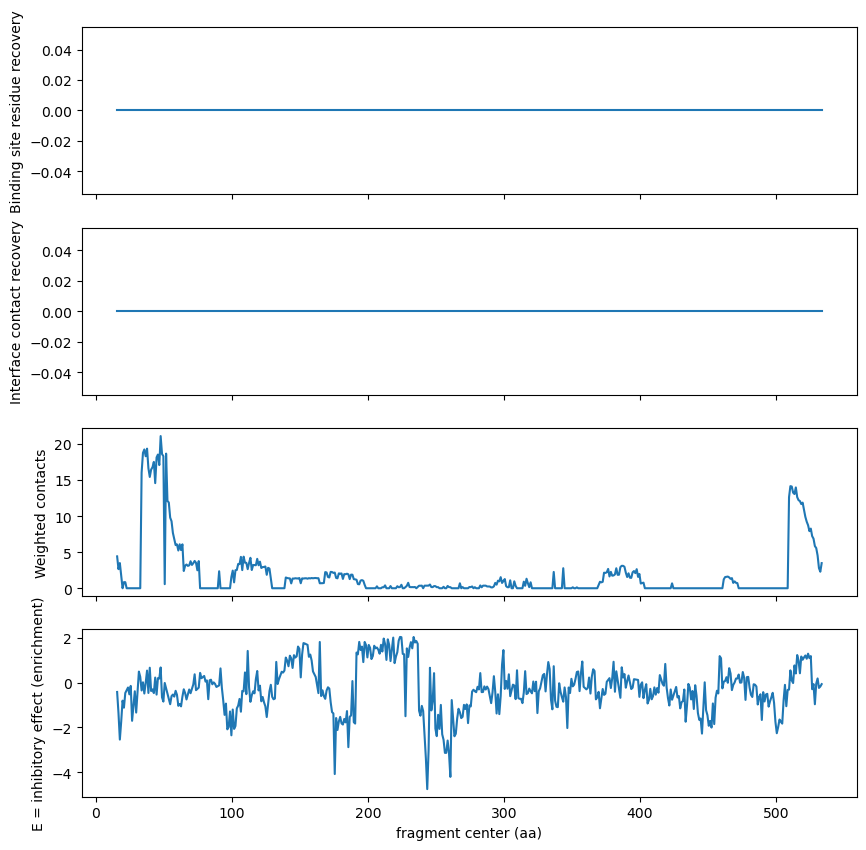

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_431-460.png',dpi=300)

## grol 488-515

In [58]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_POUBAGHNM.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(486,515),'B':resRange(),'H':resRange(),
                                                'P':resRange(),'O':resRange(),'U':resRange(),
                                                'H':resRange(),'N':resRange(),'M':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B','H','P','O','U','H','N','M'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

8
['A_509-B_385', 'A_513-B_387', 'A_509-B_388', 'A_506-B_384', 'A_513-B_37', 'A_513-B_49', 'A_510-B_385', 'A_509-B_384']


In [59]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [486]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groL')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groL')]
rec_list = []
bindingres_rec_list = []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'B':resRange()})
    s_extract[0]['A'].id = 'X'
    s_extract[0]['B'].id = 'A'
    s_extract[0]['X'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains B-A in native) has {len(contacts_residues)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues])
        
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        
        # Check B-A contacts
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

groEL_1-548_groEL_486-515 486
experimental fragment groEL_1-548_groEL_486-515 (originally chains B-A in native) has 8 contacts
['A_384-B_509', 'A_49-B_513', 'A_387-B_513', 'A_385-B_510', 'A_388-B_509', 'A_37-B_513', 'A_385-B_509', 'A_384-B_506']
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_62-B_3', 'A_61-B_1', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3', 'A_41-B_4']
pred fragment groEL_1-548_groEL_1-30 has 
9 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_61-B_2', 'A_62-B_3', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3']
pred fragment groEL_1-548_groEL_2-31 has 
8 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_63-B_3', 'A_62-B_3', 'A_61-B_4', 'A_25-B_8', 'A_61-B_3', 'A_41-B_4']
pred fragment groEL_1-548_groEL_3-32 has 
8 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_59-B_4', 'A_26-B_8', 'A_61-B_4', 'A_25-B_8']
pred fragment groEL_1-548_groEL_4-33

['A_521-B_41', 'A_517-B_37', 'A_115-B_34', 'A_69-B_41', 'A_519-B_39', 'A_13-B_36', 'A_112-B_34', 'A_521-B_40', 'A_118-B_33', 'A_513-B_49', 'A_69-B_39', 'A_518-B_29', 'A_519-B_37', 'A_69-B_47', 'A_518-B_37', 'A_65-B_41', 'A_520-B_39', 'A_513-B_37', 'A_516-B_37', 'A_517-B_39', 'A_69-B_40', 'A_516-B_36', 'A_518-B_36', 'A_522-B_41', 'A_113-B_36', 'A_521-B_39', 'A_72-B_47', 'A_114-B_35', 'A_114-B_34', 'A_76-B_46', 'A_519-B_38', 'A_73-B_47', 'A_73-B_49']
pred fragment groEL_1-548_groEL_29-58 has 
33 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_521-B_41', 'A_517-B_37', 'A_115-B_34', 'A_69-B_41', 'A_519-B_39', 'A_112-B_34', 'A_521-B_40', 'A_118-B_33', 'A_513-B_49', 'A_69-B_39', 'A_519-B_37', 'A_69-B_47', 'A_518-B_37', 'A_65-B_41', 'A_4-B_59', 'A_520-B_39', 'A_513-B_37', 'A_516-B_37', 'A_517-B_39', 'A_114-B_51', 'A_69-B_40', 'A_516-B_36', 'A_518-B_36', 'A_522-B_41', 'A_113-B_36', 'A_521-B_39', 'A_72-B_47', 'A_114-B_35', 'A_114-B_34', 'A_76-B_46', 'A_519-B_38

['A_3-B_63', 'A_513-B_49', 'A_4-B_59', 'A_521-B_59', 'A_1-B_61', 'A_114-B_51', 'A_4-B_61', 'A_3-B_61', 'A_73-B_49']
pred fragment groEL_1-548_groEL_49-78 has 
9 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_47-B_69', 'A_41-B_69', 'A_49-B_73', 'A_39-B_69', 'A_387-B_76', 'A_47-B_73', 'A_40-B_69', 'A_46-B_76', 'A_47-B_72', 'A_41-B_65']
pred fragment groEL_1-548_groEL_50-79 has 
10 interface contacts and (0, 8) recovery
6 binding site contacts and 2 recovery
['A_47-B_69', 'A_41-B_69', 'A_49-B_73', 'A_386-B_80', 'A_39-B_69', 'A_387-B_76', 'A_47-B_73', 'A_40-B_69', 'A_46-B_76', 'A_47-B_72', 'A_41-B_65']
pred fragment groEL_1-548_groEL_51-80 has 
11 interface contacts and (0, 8) recovery
6 binding site contacts and 2 recovery
['A_3-B_63', 'A_4-B_59', 'A_521-B_59', 'A_1-B_61', 'A_4-B_61', 'A_6-B_60', 'A_3-B_61']
pred fragment groEL_1-548_groEL_52-81 has 
7 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_47-B_69', 'A_41-B_69'

['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_34-B_112']
pred fragment groEL_1-548_groEL_95-124 has 
5 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_458-B_112', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_96-125 has 
7 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_97-126 has 
6 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_51-B_114', 'A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_98-127 has 
7 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_51-B_114', 'A_34-B_114', 'A_33-B_118', 'A_34-B_115', 'A_35-B_114', 'A_457-B_112', 'A_34-B_112']
pred fragment groEL_1-548_groEL_99-128 has 
7 

['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_141-170 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_142-171 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_143-172 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_144-173 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_145-174 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_146-175 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_118-B_154', 'A_118-B_153']
pred fragment groEL_1-548_groEL_1

[]
pred fragment groEL_1-548_groEL_193-222 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_267-B_223', 'A_202-B_197']
pred fragment groEL_1-548_groEL_194-223 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_203-B_224']
pred fragment groEL_1-548_groEL_195-224 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_264-B_224']
pred fragment groEL_1-548_groEL_196-225 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_264-B_224']
pred fragment groEL_1-548_groEL_197-226 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_264-B_224', 'A_260-B_224', 'A_1-B_214']
pred fragment groEL_1-548_groEL_198-227 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_257-B_226']
pred fragment groEL_1-548_groEL_199-228 has 
1 interface contacts and (0, 8) recovery
6 binding site contact

[]
pred fragment groEL_1-548_groEL_247-276 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_248-277 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_249-278 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_250-279 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_251-280 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_252-281 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_526-B_282', 'A_526-B_280', 'A_526-B_281', 'A_524-B_281', 'A_2-B_281']
pred fragment groEL_1-548_groEL_253-282 has 
5 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groE

[]
pred fragment groEL_1-548_groEL_297-326 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_328-B_327']
pred fragment groEL_1-548_groEL_298-327 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_327-B_327']
pred fragment groEL_1-548_groEL_299-328 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_268-B_305', 'A_526-B_319', 'A_523-B_321', 'A_268-B_304', 'A_522-B_321', 'A_4-B_321']
pred fragment groEL_1-548_groEL_300-329 has 
6 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_264-B_305', 'A_268-B_307', 'A_68-B_321']
pred fragment groEL_1-548_groEL_301-330 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_4-B_322', 'A_264-B_305', 'A_65-B_321', 'A_268-B_305', 'A_264-B_304', 'A_521-B_322', 'A_260-B_304', 'A_523-B_321', 'A_524-B_321', 'A_522-B_321', 'A_523-B_322']
pred fragment groEL_1-548_groEL_302-331 has

['A_506-B_384']
pred fragment groEL_1-548_groEL_355-384 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_506-B_384', 'A_509-B_385', 'A_510-B_385']
pred fragment groEL_1-548_groEL_356-385 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_506-B_385', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385']
pred fragment groEL_1-548_groEL_357-386 has 
4 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_506-B_385', 'A_509-B_384', 'A_73-B_387', 'A_76-B_387', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_510-B_385', 'A_513-B_387']
pred fragment groEL_1-548_groEL_358-387 has 
9 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_506-B_385', 'A_509-B_384', 'A_73-B_387', 'A_80-B_386', 'A_506-B_384', 'A_509-B_385', 'A_513-B_388', 'A_510-B_385', 'A_513-B_387', 'A_509-B_388']
pred fragment groEL_1-548_groEL_359-388 has 
10 interface contacts and (0, 8) recovery
6 binding

[]
pred fragment groEL_1-548_groEL_390-419 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_391-420 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_392-421 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_393-422 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_394-423 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_395-424 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_396-425 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groEL_1-548_groEL_397-426 has 
0 interface contacts and (0, 0) recovery
6 binding site 

['A_112-B_458', 'A_112-B_457']
pred fragment groEL_1-548_groEL_452-481 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_458', 'A_112-B_459', 'A_112-B_457']
pred fragment groEL_1-548_groEL_453-482 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_458', 'A_112-B_457']
pred fragment groEL_1-548_groEL_454-483 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_458', 'A_115-B_483', 'A_112-B_459', 'A_112-B_457']
pred fragment groEL_1-548_groEL_455-484 has 
4 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_458', 'A_112-B_459', 'A_112-B_457']
pred fragment groEL_1-548_groEL_456-485 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_457']
pred fragment groEL_1-548_groEL_457-486 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_112-B_458']
pre

['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_38-B_519', 'A_43-B_523', 'A_38-B_521', 'A_37-B_519', 'A_36-B_516', 'A_37-B_518', 'A_388-B_509', 'A_37-B_513', 'A_39-B_520', 'A_41-B_521', 'A_37-B_517', 'A_39-B_521', 'A_385-B_506', 'A_40-B_521', 'A_385-B_509', 'A_384-B_506', 'A_37-B_516', 'A_36-B_518', 'A_63-B_524', 'A_39-B_517', 'A_39-B_519']
pred fragment groEL_1-548_groEL_502-531 has 
24 interface contacts and (5, 8) recovery
6 binding site contacts and 5 recovery
['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_387-B_513', 'A_38-B_519', 'A_43-B_523', 'A_37-B_519', 'A_36-B_516', 'A_37-B_518', 'A_388-B_509', 'A_37-B_513', 'A_39-B_520', 'A_41-B_521', 'A_37-B_517', 'A_39-B_521', 'A_385-B_506', 'A_40-B_521', 'A_385-B_509', 'A_384-B_506', 'A_37-B_516', 'A_36-B_518', 'A_63-B_524', 'A_39-B_517', 'A_39-B_519']
pred fragment groEL_1-548_groEL_503-532 has 
24 interface contacts and (6, 8) recovery
6 binding site contacts and 6 recovery
['A_41-B_522', 'A_59-B_521', 'A_49-B_513', 'A_38-B_519', 'A_43-B_

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


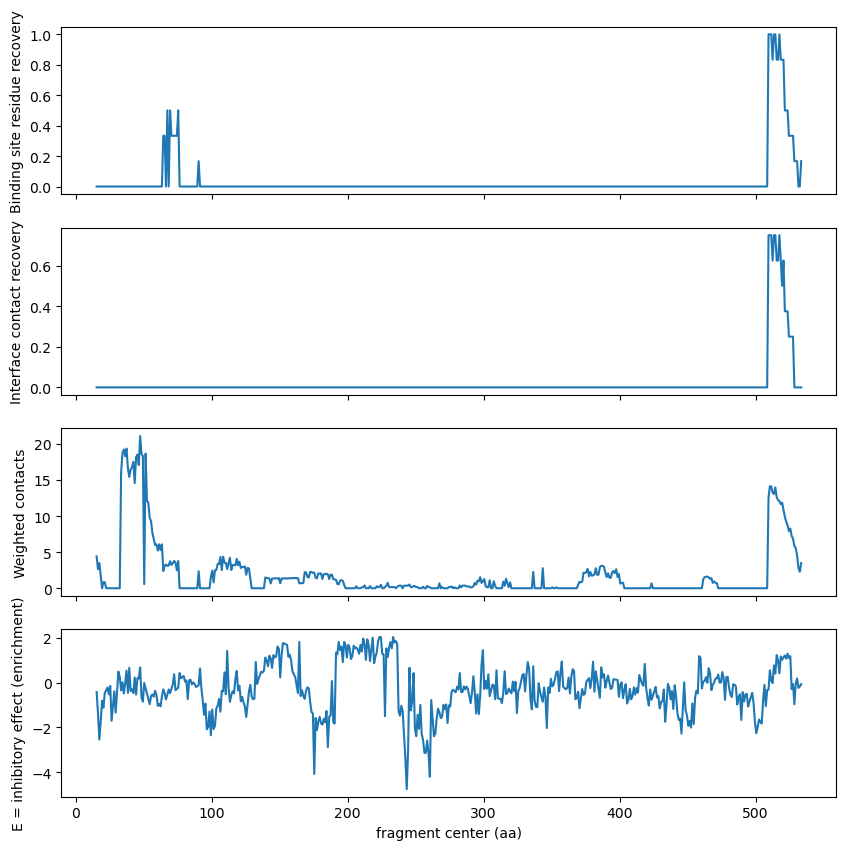

In [60]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_486-515.png',dpi=300)

# groL - groS

## groL 229-258

In [70]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_POUBAGHNM.pdb'
parser = PDBParser(QUIET=True)
# s_extract = extractFragmentFromNativeStructure(s_path,
#                                                {'A':resRange(229,258),'O':resRange()})
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(229,258),'B':resRange(),'H':resRange(),
                                                'P':resRange(),'O':resRange(),'U':resRange(),
                                                'H':resRange(),'N':resRange(),'M':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B','H','P','O','U','H','N','M'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

9
['A_238-O_26', 'A_234-O_22', 'A_257-O_31', 'A_242-O_25', 'A_234-O_23', 'A_238-O_23', 'A_234-O_26', 'A_241-O_25', 'A_237-O_26']


In [71]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [229]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groS')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groS')]
rec_list = []
bindingres_rec_list = []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'O':resRange()})
    s_extract[0]['A'].id = 'B'
    s_extract[0]['O'].id = 'A'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains A-O in native) has {len(contacts_residues)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues])
        
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        
        # Check B-A contacts
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

groES1copies_1-97_groEL_229-258 229
experimental fragment groES1copies_1-97_groEL_229-258 (originally chains A-O in native) has 9 contacts
['A_25-B_242', 'A_22-B_234', 'A_26-B_238', 'A_23-B_238', 'A_26-B_234', 'A_23-B_234', 'A_26-B_237', 'A_25-B_241', 'A_31-B_257']
[]
pred fragment groES1copies_1-97_groEL_1-30 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_2-31 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_3-32 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_4-33 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_5-34 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_6-35 has 
0 interface contacts and (0,

['A_23-B_59', 'A_21-B_59', 'A_25-B_59']
pred fragment groES1copies_1-97_groEL_45-74 has 
3 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
['A_25-B_59']
pred fragment groES1copies_1-97_groEL_46-75 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 1 recovery
['A_25-B_56', 'A_23-B_59', 'A_22-B_61', 'A_25-B_60', 'A_28-B_49', 'A_23-B_61', 'A_25-B_59']
pred fragment groES1copies_1-97_groEL_47-76 has 
7 interface contacts and (0, 9) recovery
5 binding site contacts and 3 recovery
['A_23-B_59', 'A_24-B_48', 'A_21-B_59', 'A_25-B_59']
pred fragment groES1copies_1-97_groEL_48-77 has 
4 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
[]
pred fragment groES1copies_1-97_groEL_49-78 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_28-B_60', 'A_28-B_59']
pred fragment groES1copies_1-97_groEL_50-79 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recove

['A_71-B_112', 'A_71-B_113']
pred fragment groES1copies_1-97_groEL_102-131 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_112', 'A_71-B_111', 'A_71-B_113']
pred fragment groES1copies_1-97_groEL_103-132 has 
3 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_72-B_112', 'A_71-B_107', 'A_71-B_112', 'A_71-B_113']
pred fragment groES1copies_1-97_groEL_104-133 has 
4 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_112', 'A_71-B_113']
pred fragment groES1copies_1-97_groEL_105-134 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_112', 'A_71-B_110']
pred fragment groES1copies_1-97_groEL_106-135 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_107', 'A_71-B_112', 'A_71-B_111', 'A_71-B_113', 'A_71-B_110']
pred fragment groES1copies_1-97_groEL_107-136 has 
5 interface contacts and (0, 9) reco

['A_28-B_174']
pred fragment groES1copies_1-97_groEL_156-185 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_177']
pred fragment groES1copies_1-97_groEL_157-186 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_158-187 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_28-B_188', 'A_25-B_169', 'A_26-B_188', 'A_25-B_173', 'A_28-B_178', 'A_23-B_169', 'A_23-B_168', 'A_24-B_168']
pred fragment groES1copies_1-97_groEL_159-188 has 
8 interface contacts and (0, 9) recovery
5 binding site contacts and 3 recovery
['A_23-B_172', 'A_25-B_174', 'A_29-B_178', 'A_28-B_176', 'A_28-B_178']
pred fragment groES1copies_1-97_groEL_160-189 has 
5 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
['A_25-B_190', 'A_29-B_178', 'A_24-B_190', 'A_26-B_190', 'A_28-B_178']
pred fragment groES1copies_1-97_groEL_161-190 has 
5 inte

['A_71-B_224']
pred fragment groES1copies_1-97_groEL_203-232 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_204-233 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_71-B_223']
pred fragment groES1copies_1-97_groEL_205-234 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_206-235 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_207-236 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_71-B_223']
pred fragment groES1copies_1-97_groEL_208-237 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_225', 'A_71-B_223', 'A_71-B_226', 'A_71-B_224']
pred fragment groES1copies_1-97_groEL_209-238 has 
4 interface contacts and (0, 9) recovery
5 binding s

['A_29-B_257', 'A_26-B_261', 'A_28-B_264', 'A_28-B_261', 'A_24-B_270', 'A_25-B_271', 'A_28-B_257', 'A_26-B_268', 'A_25-B_265', 'A_28-B_260', 'A_26-B_265', 'A_26-B_264', 'A_26-B_270']
pred fragment groES1copies_1-97_groEL_251-280 has 
13 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
['A_26-B_261', 'A_28-B_264', 'A_28-B_261', 'A_24-B_270', 'A_25-B_271', 'A_28-B_257', 'A_26-B_268', 'A_25-B_265', 'A_28-B_260', 'A_30-B_257', 'A_26-B_265', 'A_26-B_264', 'A_26-B_270']
pred fragment groES1copies_1-97_groEL_252-281 has 
13 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
['A_26-B_261', 'A_28-B_264', 'A_28-B_261', 'A_24-B_270', 'A_25-B_271', 'A_28-B_257', 'A_26-B_268', 'A_25-B_265', 'A_30-B_257', 'A_26-B_265', 'A_26-B_264', 'A_26-B_270']
pred fragment groES1copies_1-97_groEL_253-282 has 
12 interface contacts and (0, 9) recovery
5 binding site contacts and 2 recovery
['A_26-B_261', 'A_28-B_264', 'A_28-B_261', 'A_24-B_270', 'A_28-B_257'

[]
pred fragment groES1copies_1-97_groEL_296-325 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_28-B_304', 'A_29-B_303']
pred fragment groES1copies_1-97_groEL_297-326 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_298-327 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_89-B_321', 'A_90-B_322', 'A_71-B_324']
pred fragment groES1copies_1-97_groEL_299-328 has 
3 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_327', 'A_71-B_326', 'A_71-B_325']
pred fragment groES1copies_1-97_groEL_300-329 has 
3 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_326', 'A_71-B_324']
pred fragment groES1copies_1-97_groEL_301-330 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
['A_71-B_326']
pred fragment groES1copies_1-97_groEL_302-331 has

['A_27-B_376']
pred fragment groES1copies_1-97_groEL_354-383 has 
1 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_355-384 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_356-385 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_357-386 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_358-387 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_359-388 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_360-389 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_71-B_380']
pred fragment groES1copies_1-97_gro

[]
pred fragment groES1copies_1-97_groEL_413-442 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_414-443 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_415-444 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_416-445 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_417-446 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_418-447 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_419-448 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_420-449 has 
0 interf

[]
pred fragment groES1copies_1-97_groEL_475-504 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_476-505 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_477-506 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_478-507 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_479-508 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
['A_71-B_509', 'A_71-B_508']
pred fragment groES1copies_1-97_groEL_480-509 has 
2 interface contacts and (0, 9) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_481-510 has 
0 interface contacts and (0, 0) recovery
5 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_g

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


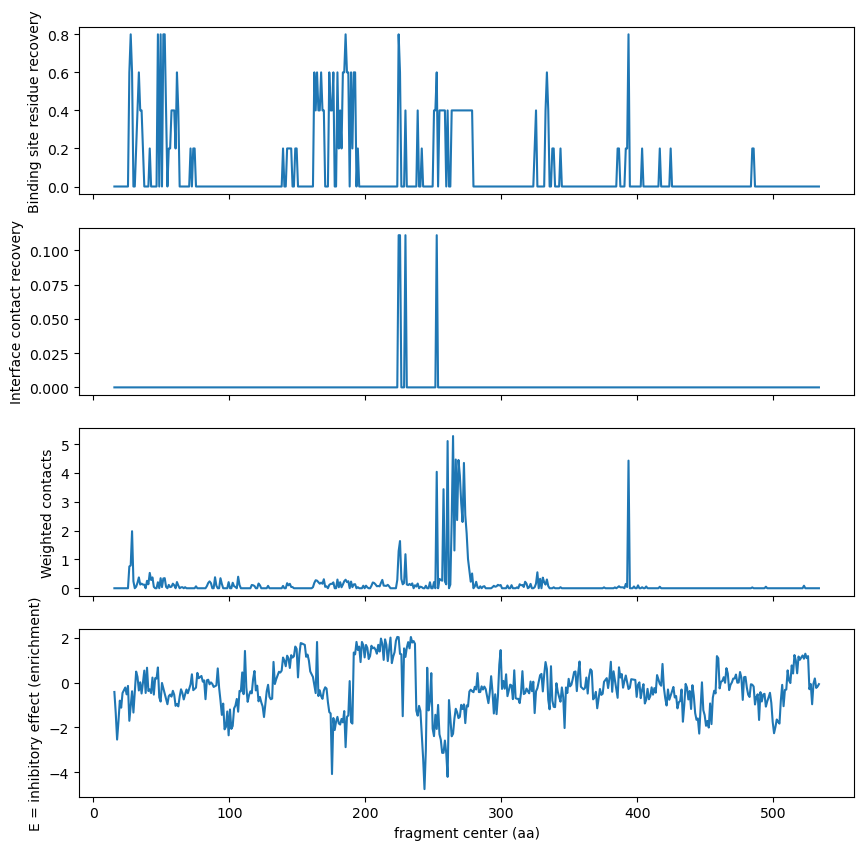

In [72]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_229-258.png',dpi=300)

## groL 246-275

In [73]:
# Get the contact info for each fragment
s_path = structure_dir_path+'1aon_groEL_POUBAGHNM.pdb'
parser = PDBParser(QUIET=True)
# s_extract = extractFragmentFromNativeStructure(s_path,
#                                                {'A':resRange(229,258),'O':resRange()})
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'A':resRange(246,275),'B':resRange(),'H':resRange(),
                                                'P':resRange(),'O':resRange(),'U':resRange(),
                                                'H':resRange(),'N':resRange(),'M':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B','H','P','O','U','H','N','M'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

8
['A_257-O_31', 'A_265-O_26', 'A_261-O_28', 'A_270-O_27', 'A_270-O_25', 'A_265-O_27', 'A_261-O_27', 'A_261-O_29']


In [74]:
s_path = structure_dir_path+'1aon_groEL_BAGHNM_groES_POU.pdb'
gene_name = 'groL-coding-EcoliBL21DE3'
frag_aa_start = [246]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_groS')]
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0)&(merge_df['condition']=='30aa_monomer_groS')]
rec_list = []
bindingres_rec_list = []

for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'])
    s_extract = extractFragmentFromNativeStructure(s_path,{'A':resRange(frag_aa_start[0],frag_aa_start[0]+29),'O':resRange()})
    s_extract[0]['A'].id = 'B'
    s_extract[0]['O'].id = 'A'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} (originally chains A-O in native) has {len(contacts_residues)} contacts")
    print([residueContactName(x,y) for x,y in contacts_residues])
        
    for j,row_pred in pred_df.iterrows():
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],0)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        
        # Check B-A contacts
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

groES1copies_1-97_groEL_246-275 246
experimental fragment groES1copies_1-97_groEL_246-275 (originally chains A-O in native) has 8 contacts
['A_27-B_261', 'A_28-B_261', 'A_27-B_270', 'A_29-B_261', 'A_27-B_265', 'A_26-B_265', 'A_25-B_270', 'A_31-B_257']
[]
pred fragment groES1copies_1-97_groEL_1-30 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_2-31 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_3-32 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_4-33 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_5-34 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_6-35 has 
0 interface contacts and (0, 0) recovery
6

[]
pred fragment groES1copies_1-97_groEL_49-78 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_28-B_60', 'A_28-B_59']
pred fragment groES1copies_1-97_groEL_50-79 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 1 recovery
['A_20-B_63']
pred fragment groES1copies_1-97_groEL_51-80 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_20-B_63']
pred fragment groES1copies_1-97_groEL_52-81 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_20-B_63', 'A_28-B_59']
pred fragment groES1copies_1-97_groEL_53-82 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 1 recovery
[]
pred fragment groES1copies_1-97_groEL_54-83 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_55-84 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pre

[]
pred fragment groES1copies_1-97_groEL_115-144 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_116-145 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_47-B_117']
pred fragment groES1copies_1-97_groEL_117-146 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_118-147 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_119-148 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_120-149 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_121-150 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_122-151 h

['A_24-B_197', 'A_23-B_197']
pred fragment groES1copies_1-97_groEL_168-197 has 
2 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_20-B_186', 'A_26-B_178', 'A_24-B_188', 'A_23-B_188', 'A_22-B_190', 'A_24-B_190', 'A_26-B_186', 'A_23-B_190']
pred fragment groES1copies_1-97_groEL_169-198 has 
8 interface contacts and (0, 8) recovery
6 binding site contacts and 1 recovery
['A_20-B_186', 'A_26-B_178', 'A_25-B_190', 'A_24-B_188', 'A_23-B_188', 'A_23-B_189', 'A_24-B_190', 'A_28-B_178', 'A_23-B_190']
pred fragment groES1copies_1-97_groEL_170-199 has 
9 interface contacts and (0, 8) recovery
6 binding site contacts and 3 recovery
['A_20-B_186', 'A_26-B_178', 'A_20-B_188', 'A_24-B_188', 'A_22-B_190', 'A_24-B_190', 'A_25-B_178', 'A_28-B_178', 'A_23-B_190']
pred fragment groES1copies_1-97_groEL_171-200 has 
9 interface contacts and (0, 8) recovery
6 binding site contacts and 3 recovery
['A_26-B_178', 'A_25-B_190', 'A_20-B_188', 'A_23-B_191', 'A_24-B_190', 'A_28-B_1

['A_69-B_226']
pred fragment groES1copies_1-97_groEL_223-252 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_25-B_237', 'A_27-B_234', 'A_27-B_230', 'A_33-B_231', 'A_31-B_230']
pred fragment groES1copies_1-97_groEL_224-253 has 
5 interface contacts and (0, 8) recovery
6 binding site contacts and 3 recovery
[]
pred fragment groES1copies_1-97_groEL_225-254 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_71-B_252']
pred fragment groES1copies_1-97_groEL_226-255 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_24-B_247', 'A_26-B_248', 'A_24-B_246', 'A_28-B_248']
pred fragment groES1copies_1-97_groEL_227-256 has 
4 interface contacts and (0, 8) recovery
6 binding site contacts and 2 recovery
['A_71-B_250']
pred fragment groES1copies_1-97_groEL_228-257 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_71-B_251']
pred fragment groES1cop

['A_71-B_281']
pred fragment groES1copies_1-97_groEL_266-295 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_71-B_281', 'A_47-B_284', 'A_90-B_281', 'A_89-B_284', 'A_71-B_277']
pred fragment groES1copies_1-97_groEL_267-296 has 
5 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
['A_71-B_281']
pred fragment groES1copies_1-97_groEL_268-297 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_269-298 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_71-B_281']
pred fragment groES1copies_1-97_groEL_270-299 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_271-300 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_71-B_281', 'A_71-B_284']
pred fragment groES1copies_1-97_groEL_272-301 has 
2 interface 

['A_25-B_331', 'A_25-B_333', 'A_28-B_329', 'A_23-B_333']
pred fragment groES1copies_1-97_groEL_320-349 has 
4 interface contacts and (0, 8) recovery
6 binding site contacts and 2 recovery
[]
pred fragment groES1copies_1-97_groEL_321-350 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_322-351 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_25-B_331']
pred fragment groES1copies_1-97_groEL_323-352 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 1 recovery
['A_25-B_333']
pred fragment groES1copies_1-97_groEL_324-353 has 
1 interface contacts and (0, 8) recovery
6 binding site contacts and 1 recovery
[]
pred fragment groES1copies_1-97_groEL_325-354 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_326-355 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts

['A_28-B_405', 'A_29-B_409', 'A_28-B_409']
pred fragment groES1copies_1-97_groEL_383-412 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 2 recovery
[]
pred fragment groES1copies_1-97_groEL_384-413 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_385-414 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_69-B_389', 'A_71-B_393', 'A_71-B_397']
pred fragment groES1copies_1-97_groEL_386-415 has 
3 interface contacts and (0, 8) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_387-416 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_388-417 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
['A_25-B_411', 'A_27-B_411']
pred fragment groES1copies_1-97_groEL_389-418 has 
2 interface contacts and (0, 8) reco

[]
pred fragment groES1copies_1-97_groEL_448-477 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_449-478 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_450-479 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_451-480 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_452-481 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_453-482 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_454-483 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_455-484 has 
0 interf

[]
pred fragment groES1copies_1-97_groEL_512-541 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_513-542 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_514-543 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_515-544 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_516-545 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_517-546 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_518-547 has 
0 interface contacts and (0, 0) recovery
6 binding site contacts and 0 recovery
[]
pred fragment groES1copies_1-97_groEL_519-548 has 
0 interf

/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/gridsan/sswanson/.conda/envs/alphafold_fragment_prediction/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


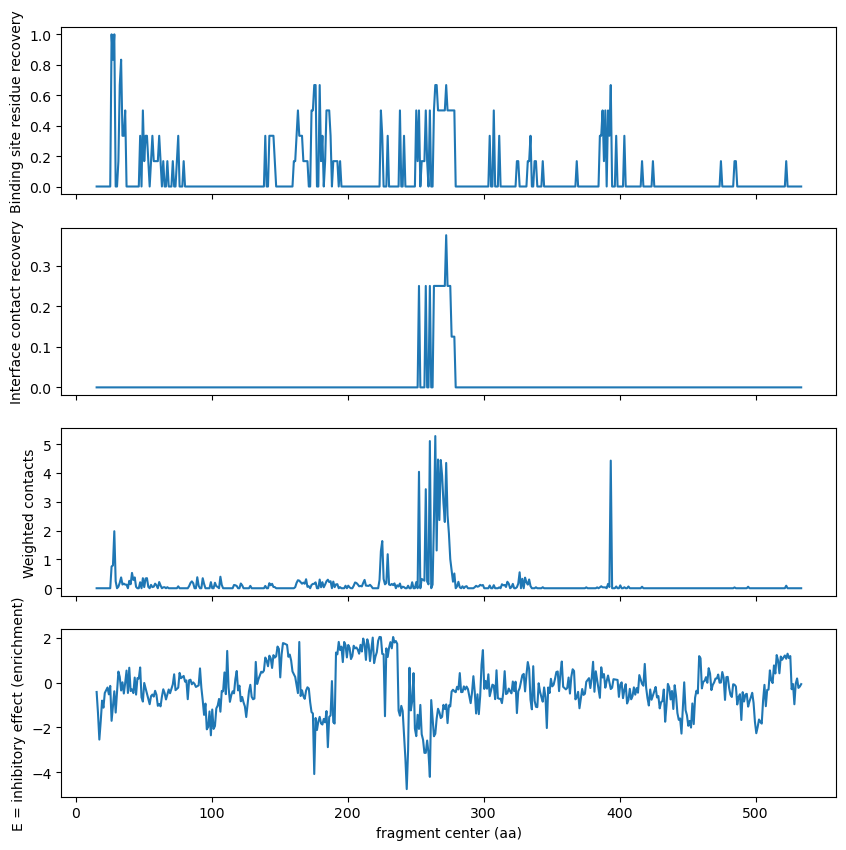

In [75]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='E = inhibitory effect (enrichment)',ax=ax4)

plt.savefig('contactAnalysis_plots/230207_grol_246-275.png',dpi=300)

# lptG - lptF

In [93]:
# Get the contact info for each fragment
s_path = structure_dir_path+'6mi7_lptG_G_lptF_F.pdb'
parser = PDBParser(QUIET=True)
s_extract = extractFragmentFromNativeStructure(s_path,
                                               {'G':resRange(309,322),'F':resRange()})
# fixResidueNumbers(s_extract[0]['B'],row['fragment start (aa)'])
contacts_residues = getInterfaceContactsFromStructure(s_extract,{'G'},{'F'},4.0)
print(len(contacts_residues))
print([residueContactName(x,y) for x,y in contacts_residues])

3
['F_32-G_321', 'F_28-G_321', 'F_29-G_321']


In [16]:
path = structure_dir_path+'6mi7_lptG_G_lptF_F.pdb'
gene_name = 'lptG-coding-EcoliBL21DE3'
parser = PDBParser(QUIET=True)

# frag_aa_start = [186,258]
frag_aa_start = [309]
inhib_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['fragment start (aa)'].isin(frag_aa_start))&(merge_df['condition']=='30aa_monomer_lptF')].copy(deep=True)
pred_df = merge_df[(merge_df['gene']==gene_name)&(merge_df['weighted_contacts']>=0.0)&(merge_df['condition']=='30aa_monomer_lptF')].copy(deep=True)
rec_list = []
bindingres_rec_list = []
for i,row in inhib_df.iterrows():
    print(row['fragment_name'],row['fragment start (aa)'],row['fragment end (aa)'])
    s_extract = extractFragmentFromNativeStructure(path,{'F':resRange(),'G':resRange(row['fragment start (aa)'],row['fragment end (aa)'])})
    s_extract[0]['F'].id = 'A'
    s_extract[0]['G'].id = 'B'
    contacts_residues = getInterfaceContactsFromStructure(s_extract,{'A'},{'B'},4.0)
    print(f"experimental fragment {row['fragment_name']} has {len(contacts_residues)} contacts")
    for j,row_pred in pred_df.iterrows():
        # Load structure
        s_prediction = parser.get_structure("s", row_pred['path'])
#         fixResidueNumbers(s_prediction[0]['A'],10)
        fixResidueNumbers(s_prediction[0]['B'],row_pred['fragment start (aa)'])
        pred_contacts = getInterfaceContactsFromStructure(s_prediction,{'A'},{'B'},4.0)
        print([residueContactName(x,y) for x,y in pred_contacts])
        rec = contactsRecovered(contacts_residues,pred_contacts)
        bindingres_rec = bindingSiteResiduesRecovered(contacts_residues,pred_contacts)
        print(f"pred fragment {row_pred['fragment_name']} has \n{len(pred_contacts)} interface contacts and {rec} recovery")
        print(f"{bindingres_rec[1]} binding site contacts and {bindingres_rec[0]} recovery")
        rec_list.append(rec[0]/rec[1] if rec[1] > 0 else 0)
        bindingres_rec_list.append(bindingres_rec[0]/bindingres_rec[1])

# sim_matrix = np.array(rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(sim_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

# bindingresrec_matrix = np.array(bindingres_rec_list).reshape(len(inhib_df),len(pred_df))
# plt.figure(figsize = (40,10))
# sns.heatmap(bindingresrec_matrix,
#             xticklabels=pred_df['fragment start (aa)'],
#             yticklabels=inhib_df['fragment start (aa)'])

pred_df['binding_site_residue_recovery'] = bindingres_rec_list
pred_df['interface_contact_recovery'] = rec_list

lptF1copies_1-366_lptG_309-322 309 322
experimental fragment lptF1copies_1-366_lptG_309-322 has 3 contacts
[]
pred fragment lptF1copies_1-366_lptG_1-14 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment lptF1copies_1-366_lptG_2-15 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment lptF1copies_1-366_lptG_3-16 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
['A_297-B_17']
pred fragment lptF1copies_1-366_lptG_4-17 has 
1 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_297-B_17']
pred fragment lptF1copies_1-366_lptG_5-18 has 
1 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
[]
pred fragment lptF1copies_1-366_lptG_6-19 has 
0 interface contacts and (0, 0) recovery
3 binding site contacts and 0 recovery
[]
pred fragment lptF1copies_1-366_lptG_7-20 has 
0 interface contacts and (0, 0) recover

['A_322-B_44', 'A_310-B_36', 'A_58-B_40', 'A_318-B_42', 'A_311-B_39', 'A_33-B_37', 'A_318-B_40', 'A_311-B_36', 'A_322-B_43', 'A_314-B_40']
pred fragment lptF1copies_1-366_lptG_36-49 has 
10 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_322-B_44', 'A_58-B_40', 'A_319-B_42', 'A_318-B_42', 'A_311-B_39', 'A_318-B_39', 'A_33-B_37', 'A_318-B_40', 'A_322-B_42', 'A_322-B_43']
pred fragment lptF1copies_1-366_lptG_37-50 has 
10 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_33-B_40', 'A_318-B_43', 'A_322-B_43']
pred fragment lptF1copies_1-366_lptG_38-51 has 
3 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_149-B_41', 'A_149-B_47', 'A_160-B_41', 'A_149-B_46', 'A_149-B_44', 'A_158-B_47', 'A_162-B_41', 'A_177-B_47', 'A_147-B_44']
pred fragment lptF1copies_1-366_lptG_39-52 has 
9 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_322-B_44', 'A_318-B_42', 'A_322-B_4

['A_86-B_91', 'A_292-B_85', 'A_292-B_86', 'A_83-B_87', 'A_87-B_90', 'A_87-B_94', 'A_90-B_91']
pred fragment lptF1copies_1-366_lptG_82-95 has 
7 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_86-B_91', 'A_90-B_95', 'A_292-B_85', 'A_83-B_87', 'A_87-B_90', 'A_87-B_94', 'A_90-B_91']
pred fragment lptF1copies_1-366_lptG_83-96 has 
7 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_86-B_91', 'A_292-B_85', 'A_83-B_87', 'A_87-B_90', 'A_87-B_94', 'A_90-B_91']
pred fragment lptF1copies_1-366_lptG_84-97 has 
6 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_292-B_85']
pred fragment lptF1copies_1-366_lptG_85-98 has 
1 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_86-B_91', 'A_83-B_87', 'A_87-B_90', 'A_87-B_94', 'A_90-B_91']
pred fragment lptF1copies_1-366_lptG_86-99 has 
5 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
[]
pred frag

['A_150-B_146', 'A_237-B_147', 'A_153-B_144', 'A_137-B_147', 'A_151-B_146', 'A_151-B_143', 'A_150-B_145', 'A_136-B_145', 'A_177-B_135', 'A_41-B_145', 'A_139-B_146', 'A_152-B_146', 'A_151-B_144', 'A_155-B_138', 'A_151-B_138', 'A_151-B_145', 'A_154-B_146', 'A_152-B_148', 'A_234-B_148', 'A_178-B_138', 'A_234-B_147', 'A_139-B_145', 'A_153-B_147', 'A_153-B_146']
pred fragment lptF1copies_1-366_lptG_135-148 has 
24 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_230-B_145', 'A_229-B_147', 'A_229-B_148', 'A_229-B_149', 'A_233-B_144', 'A_233-B_146', 'A_228-B_149']
pred fragment lptF1copies_1-366_lptG_136-149 has 
7 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_232-B_146', 'A_182-B_141', 'A_231-B_146', 'A_228-B_150', 'A_182-B_140', 'A_214-B_141', 'A_223-B_141', 'A_230-B_146']
pred fragment lptF1copies_1-366_lptG_137-150 has 
8 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_230-B_146']
pred f

['A_213-B_178']
pred fragment lptF1copies_1-366_lptG_165-178 has 
1 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_225-B_175', 'A_228-B_174', 'A_226-B_175', 'A_224-B_177', 'A_224-B_178', 'A_226-B_178', 'A_229-B_166', 'A_227-B_174', 'A_222-B_178', 'A_225-B_177', 'A_225-B_176', 'A_222-B_179', 'A_226-B_176', 'A_223-B_178', 'A_224-B_176', 'A_229-B_167', 'A_226-B_174']
pred fragment lptF1copies_1-366_lptG_166-179 has 
17 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_225-B_175', 'A_226-B_175', 'A_224-B_177', 'A_224-B_178', 'A_226-B_178', 'A_221-B_180', 'A_220-B_180', 'A_222-B_178', 'A_225-B_177', 'A_223-B_177', 'A_225-B_176', 'A_222-B_180', 'A_228-B_173', 'A_222-B_179', 'A_226-B_176', 'A_223-B_178', 'A_224-B_180', 'A_224-B_176', 'A_226-B_174', 'A_229-B_172']
pred fragment lptF1copies_1-366_lptG_167-180 has 
20 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
[]
pred fragment lptF1copies_1-366_

['A_221-B_214', 'A_229-B_206', 'A_230-B_204', 'A_223-B_211', 'A_228-B_207', 'A_222-B_213', 'A_222-B_214', 'A_222-B_212', 'A_232-B_204', 'A_225-B_209', 'A_223-B_213', 'A_226-B_210', 'A_224-B_210', 'A_224-B_211', 'A_228-B_208', 'A_176-B_204', 'A_223-B_212', 'A_226-B_209', 'A_231-B_204', 'A_220-B_214', 'A_229-B_207', 'A_231-B_205', 'A_224-B_212', 'A_225-B_210', 'A_230-B_206', 'A_224-B_214', 'A_229-B_205', 'A_227-B_206', 'A_225-B_211', 'A_230-B_205', 'A_226-B_208', 'A_174-B_204', 'A_227-B_208']
pred fragment lptF1copies_1-366_lptG_201-214 has 
33 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_229-B_206', 'A_230-B_204', 'A_223-B_211', 'A_228-B_207', 'A_222-B_213', 'A_222-B_214', 'A_232-B_204', 'A_225-B_209', 'A_226-B_210', 'A_224-B_210', 'A_224-B_211', 'A_228-B_208', 'A_176-B_204', 'A_223-B_212', 'A_180-B_202', 'A_226-B_209', 'A_231-B_204', 'A_229-B_207', 'A_231-B_205', 'A_224-B_212', 'A_225-B_210', 'A_230-B_206', 'A_224-B_214', 'A_229-B_205', 'A_227-B_206

['A_176-B_233', 'A_226-B_224', 'A_174-B_234', 'A_137-B_236', 'A_229-B_228', 'A_212-B_230', 'A_138-B_236', 'A_226-B_225', 'A_139-B_236', 'A_232-B_230', 'A_186-B_230', 'A_225-B_223', 'A_176-B_230', 'A_235-B_236', 'A_228-B_226', 'A_229-B_227', 'A_226-B_223', 'A_229-B_226', 'A_180-B_233', 'A_224-B_223', 'A_231-B_229', 'A_230-B_230', 'A_232-B_232', 'A_228-B_225', 'A_157-B_234', 'A_233-B_232', 'A_231-B_228', 'A_230-B_228', 'A_225-B_225', 'A_174-B_230', 'A_237-B_236', 'A_227-B_225', 'A_153-B_236', 'A_231-B_230', 'A_234-B_236']
pred fragment lptF1copies_1-366_lptG_223-236 has 
35 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_226-B_224', 'A_174-B_234', 'A_236-B_236', 'A_137-B_236', 'A_229-B_228', 'A_136-B_237', 'A_212-B_230', 'A_138-B_236', 'A_226-B_225', 'A_139-B_236', 'A_232-B_230', 'A_176-B_230', 'A_235-B_236', 'A_228-B_226', 'A_229-B_227', 'A_229-B_226', 'A_176-B_232', 'A_180-B_233', 'A_231-B_229', 'A_139-B_237', 'A_152-B_237', 'A_176-B_234', 'A_230-B_230

['A_172-B_271', 'A_189-B_271', 'A_171-B_270', 'A_160-B_271', 'A_189-B_266', 'A_160-B_274', 'A_162-B_270', 'A_149-B_278', 'A_173-B_271', 'A_149-B_271', 'A_213-B_266', 'A_149-B_275']
pred fragment lptF1copies_1-366_lptG_265-278 has 
12 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_40-B_270', 'A_39-B_273']
pred fragment lptF1copies_1-366_lptG_266-279 has 
2 interface contacts and (0, 3) recovery
3 binding site contacts and 0 recovery
['A_32-B_277', 'A_36-B_273', 'A_40-B_270', 'A_39-B_273']
pred fragment lptF1copies_1-366_lptG_267-280 has 
4 interface contacts and (0, 3) recovery
3 binding site contacts and 1 recovery
['A_32-B_277', 'A_40-B_270', 'A_148-B_270', 'A_39-B_273']
pred fragment lptF1copies_1-366_lptG_268-281 has 
4 interface contacts and (0, 3) recovery
3 binding site contacts and 1 recovery
['A_32-B_277', 'A_39-B_270', 'A_40-B_270', 'A_148-B_270', 'A_39-B_273', 'A_35-B_273']
pred fragment lptF1copies_1-366_lptG_269-282 has 
6 interface contac

['A_25-B_313', 'A_33-B_324', 'A_62-B_319', 'A_311-B_323', 'A_311-B_322', 'A_303-B_315', 'A_29-B_320', 'A_307-B_322', 'A_314-B_323', 'A_310-B_319', 'A_307-B_319', 'A_33-B_320', 'A_311-B_326', 'A_66-B_315']
pred fragment lptF1copies_1-366_lptG_313-326 has 
14 interface contacts and (0, 3) recovery
3 binding site contacts and 1 recovery
['A_62-B_319', 'A_311-B_323', 'A_311-B_322', 'A_303-B_315', 'A_29-B_320', 'A_307-B_322', 'A_314-B_323', 'A_307-B_315', 'A_310-B_319', 'A_307-B_319', 'A_318-B_327', 'A_33-B_320', 'A_311-B_326']
pred fragment lptF1copies_1-366_lptG_314-327 has 
13 interface contacts and (0, 3) recovery
3 binding site contacts and 1 recovery
['A_322-B_328', 'A_62-B_319', 'A_311-B_323', 'A_311-B_322', 'A_303-B_315', 'A_29-B_320', 'A_307-B_322', 'A_314-B_323', 'A_310-B_319', 'A_307-B_319', 'A_318-B_327', 'A_33-B_320', 'A_66-B_315']
pred fragment lptF1copies_1-366_lptG_315-328 has 
13 interface contacts and (0, 3) recovery
3 binding site contacts and 1 recovery
['A_62-B_319', 'A

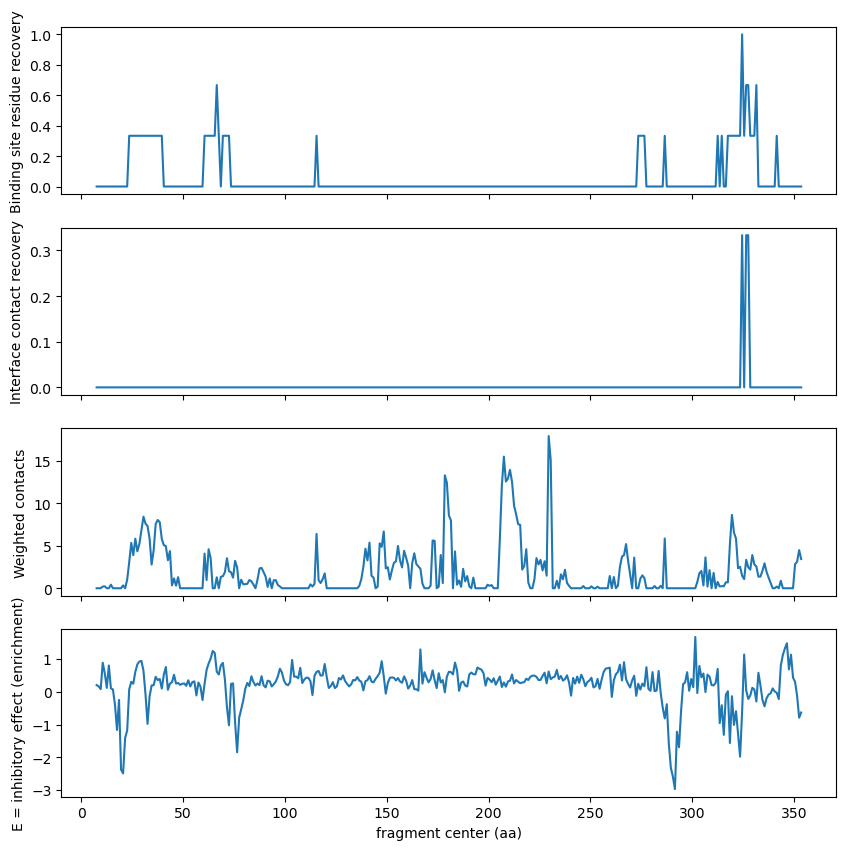

In [131]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
sns.lineplot(data=pred_df,x='fragment center (aa)',y='binding_site_residue_recovery',ax=ax1)
ax1.set_ylabel('Binding site residue recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='interface_contact_recovery',ax=ax2)
ax2.set_ylabel('Interface contact recovery')

sns.lineplot(data=pred_df,x='fragment center (aa)',y='weighted_contacts',ax=ax3)
ax3.set_ylabel('Weighted contacts')

sns.lineplot(data=pred_df,x='fragment center (aa)',y="E = inhibitory effect (enrichment)",ax=ax4)

plt.savefig('contactAnalysis_plots/230207_lptG_309-338.png',dpi=300)